# Importing necessary libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from  sklearn.decomposition import  PCA
from sklearn import preprocessing
from sklearn import tree
from sklearn.manifold import TSNE

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 

# Exploring the dataset

Dataset url: https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
train_data.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  tBodyAcc-max()-Y  tBodyAcc-max()-Z  \
0         -0.923527         -0.934724         -0.567378         -0.744413   
1         -0.957686         -0.943068         -0.557851         -0.818409   
2         -0.977469         -0.938692         -0.557851         -0.818409   
3         -0.989302         -0.938692         -0.576159         -0.829711   
4         -0.990441         -0.942469         -0.569174         -0.824705   

   tBodyAcc-min()-X  tBodyAcc-min()-Y  tBodyAcc-min()-Z  tBodyAcc-sma()  \
0          0.852947          0.685845          0.814263       -0.965523   
1          0.849308          0.685845          0.822637       -0.981930   
2          0.843609          0.682401          0.839344       -0.983478   
3          0.843609          0.682401          0.837869       -0.986093   
4          0.849095          0.683250          0.837869       -0.992653   

   tBodyAcc-energy()-X  tBodyAcc-energy()-Y  tBodyAcc-energy()-Z  \
0            -0.999945            -0.999863            -0.994612   
1            -0.999991            -0.999788            -0.998405   
2            -0.999969            -0.999660            -0.999470   
3            -0.999976            -0.999736            -0.999504   
4            -0.999991            -0.999856            -0.999757   

   tBodyAcc-iqr()-X  tBodyAcc-iqr()-Y  tBodyAcc-iqr()-Z  tBodyAcc-entropy()-X  \
0         -0.994231         -0.987614         -0.943220             -0.407747   
1         -0.999150         -0.977866         -0.948225             -0.714892   
2         -0.997130         -0.964810         -0.974675             -0.592235   
3         -0.997180         -0.983799         -0.986007             -0.627446   
4         -0.998004         -0.981232         -0.991325             -0.786553   

   tBodyAcc-entropy()-Y  tBodyAcc-entropy()-Z  tBodyAcc-arCoeff()-X,1  \
0             -0.679338             -0.602122                0.929294   
1             -0.500930             -0.570979                0.611627   
2             -0.485821             -0.570979                0.273025   
3             -0.850930             -0.911872                0.061436   
4             -0.559477             -0.761434                0.313276   

   tBodyAcc-arCoeff()-X,2  tBodyAcc-arCoeff()-X,3  tBodyAcc-arCoeff()-X,4  \
0               -0.853011                0.359910               -0.058526   
1               -0.329549                0.284213                0.284595   
2               -0.086309                0.337202               -0.164739   
3                0.074840                0.198204               -0.264307   
4               -0.131208                0.191161                0.086904   

   tBodyAcc-arCoeff()-Y,1  tBodyAcc-arCoeff()-Y,2  tBodyAcc-arCoeff()-Y,3  \
0                0.256892               -0.224848                0.264106   
1                0.115705               -0.090963                0.294310   
2                0.017150               -0.074507                0.342256   
3                0.072545              

In [4]:
train_data.tail()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
7347         -0.195387          0.039905          0.077078         -0.282301   
7348         -0.235309          0.004816          0.059280         -0.322552   
7349         -0.218218         -0.103822          0.274533         -0.304515   
7350         -0.219139         -0.111412          0.268893         -0.310487   
7351         -0.269270         -0.087212          0.177404         -0.377404   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  tBodyAcc-max()-Y  \
7347          0.043616          0.060410          0.210795          0.029369   
7348         -0.029456          0.080585          0.117440          0.029369   
7349         -0.098913          0.332584          0.043999         -0.110405   
7350         -0.068200          0.319473          0.101702         -0.149495   
7351         -0.038678          0.229430          0.269013         -0.147028   

      tBodyAcc-max()-Z  tBodyAcc-min()-X  tBodyAcc-min()-Y  tBodyAcc-min()-Z  \
7347         -0.076700          0.273480          0.186626          0.266917   
7348         -0.031966          0.282174          0.202880          0.266917   
7349          0.055411          0.263175          0.202880          0.264670   
7350          0.055411          0.234850          0.237784          0.264670   
7351         -0.133749          0.234850          0.237784          0.301579   

      tBodyAcc-sma()  tBodyAcc-energy()-X  tBodyAcc-energy()-Y  \
7347        0.000698            -0.674986            -0.788077   
7348       -0.041310            -0.706359            -0.804546   
7349        0.008034            -0.693162            -0.844279   
7350        0.020011            -0.693855            -0.846871   
7351       -0.027958            -0.730624            -0.838478   

      tBodyAcc-energy()-Z  tBodyAcc-iqr()-X  tBodyAcc-iqr()-Y  \
7347            -0.473463         -0.501092         -0.166197   
7348            -0.495789         -0.520057         -0.279863   
7349            -0.271194         -0.488620         -0.250723   
7350            -0.279718         -0.488245         -0.196204   
7351            -0.368309         -0.627128         -0.112288   

      tBodyAcc-iqr()-Z  tBodyAcc-entropy()-X  tBodyAcc-entropy()-Y  \
7347          0.034015              0.195643              0.140158   
7348          0.026565              0.178138              0.293566   
7349          0.334376              0.173131              0.276040   
7350          0.239455              0.160333              0.246561   
7351          0.262496              0.312180              0.333536   

      tBodyAcc-entropy()-Z  tBodyAcc-arCoeff()-X,1  tBodyAcc-arCoeff()-X,2  \
7347             -0.082077               -0.561607                0.426433   
7348             -0.051532               -0.361660                0.149854   
7349              0.152003               -0.376773                0.200784   
7350              0.021678               -0.475165                0.296546   
7351             -0.099101               -0.442905                0.386497   

      tBodyAcc-arCoeff()-X,3  tBodyAcc-arCoeff()-X,4  tBodyAcc-arCoeff()-Y,1  \
7347               -0.078255               -0.056751               -0.094106   
7348                0.206839               -0.154722                0.032725   
7349                0.063584               -0.017019               -0.004323   
7350                0.009588               -0.038354               -0.277801   
7351               -0.230562                0.139282               -0.446446   

      tBodyAc

In [5]:
test_data = pd.read_csv("test.csv")

In [6]:
test_data.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  tBodyAcc-max()-Y  tBodyAcc-max()-Z  \
0         -0.674302         -0.894088         -0.554577         -0.466223   
1         -0.945823         -0.894088         -0.554577         -0.806013   
2         -0.963483         -0.939260         -0.568512         -0.799116   
3         -0.968897         -0.938610         -0.568512         -0.799116   
4         -0.977346         -0.938610         -0.560831         -0.825894   

   tBodyAcc-min()-X  tBodyAcc-min()-Y  tBodyAcc-min()-Z  tBodyAcc-sma()  \
0          0.717208          0.635502          0.789497       -0.877764   
1          0.768031          0.683698          0.796706       -0.969097   
2          0.848305          0.667864          0.822442       -0.976782   
3          0.848305          0.667864          0.822442       -0.974418   
4          0.849179          0.670700          0.829897       -0.975283   

   tBodyAcc-energy()-X  tBodyAcc-energy()-Y  tBodyAcc-energy()-Z  \
0            -0.997766            -0.998414            -0.934345   
1            -0.999580            -0.999646            -0.997720   
2            -0.999954            -0.999570            -0.998720   
3            -0.999953            -0.999330            -0.998933   
4            -0.999954            -0.999467            -0.998823   

   tBodyAcc-iqr()-X  tBodyAcc-iqr()-Y  tBodyAcc-iqr()-Z  tBodyAcc-entropy()-X  \
0         -0.975669         -0.949824         -0.830478             -0.168084   
1         -0.994006         -0.973637         -0.950720             -0.302437   
2         -0.993456         -0.974266         -0.964976             -0.617916   
3         -0.995236         -0.978739         -0.969982             -0.749578   
4         -0.993498         -0.967032         -0.976257             -0.590576   

   tBodyAcc-entropy()-Y  tBodyAcc-entropy()-Z  tBodyAcc-arCoeff()-X,1  \
0             -0.378996              0.246217                0.521204   
1             -0.348243             -0.404785                0.507492   
2             -0.695490             -0.536693                0.242147   
3             -0.899226             -0.553813                0.174684   
4             -0.740206             -0.799419                0.115570   

   tBodyAcc-arCoeff()-X,2  tBodyAcc-arCoeff()-X,3  tBodyAcc-arCoeff()-X,4  \
0               -0.487793                0.482280               -0.045462   
1               -0.156495                0.040674                0.272991   
2               -0.114997                0.032703                0.192385   
3               -0.051332                0.034200                0.153639   
4               -0.028923               -0.032804                0.294340   

   tBodyAcc-arCoeff()-Y,1  tBodyAcc-arCoeff()-Y,2  tBodyAcc-arCoeff()-Y,3  \
0                0.211955               -0.134894                0.130858   
1                0.197566               -0.194556                0.411411   
2               -0.011945               -0.063363                0.470819   
3                0.030767              

In [7]:
train_data.shape

(7352, 563)

In [8]:
train_data.describe()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999873         -1.000000         -1.000000   
25%           -0.992754         -0.978129         -0.980233         -0.993591   
50%           -0.946196         -0.851897         -0.859365         -0.950709   
75%           -0.242813         -0.034231         -0.262415         -0.292680   
max            1.000000          0.916238          1.000000          1.000000   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  tBodyAcc-max()-Y  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.526907         -0.606150         -0.468604         -0.306043   
std            0.485942          0.414122          0.544547          0.282243   
min           -1.000000         -1.000000         -1.000000         -1.000000   
25%           -0.978162         -0.980251         -0.936219         -0.563561   
50%           -0.857328         -0.857143         -0.881637         -0.479677   
75%           -0.066701         -0.265671         -0.017129         -0.065364   
max            0.967664          1.000000          1.000000          1.000000   

       tBodyAcc-max()-Z  tBodyAcc-min()-X  tBodyAcc-min()-Y  tBodyAcc-min()-Z  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.557121          0.523551          0.387386          0.594374   
std            0.293867          0.363594          0.343611          0.297818   
min           -1.000000         -1.000000         -1.000000         -1.000000   
25%           -0.812744          0.197051          0.101829          0.389787   
50%           -0.736516          0.792060          0.627737          0.778059   
75%           -0.332014          0.844420          0.685622          0.837323   
max            1.000000          1.000000          1.000000          1.000000   

       tBodyAcc-sma()  tBodyAcc-energy()-X  tBodyAcc-energy()-Y  \
count     7352.000000          7352.000000          7352.000000   
mean        -0.547569            -0.820041            -0.901874   
std          0.471808             0.259607             0.126333   
min         -1.000000            -1.000000            -0.999999   
25%         -0.982992            -0.999936            -0.999786   
50%         -0.885461            -0.998046            -0.994065   
75%         -0.107428            -0.710707            -0.816703   
max          1.000000             1.000000             1.000000   

       tBodyAcc-energy()-Z  tBodyAcc-iqr()-X  tBodyAcc-iqr()-Y  \
count          7352.000000       7352.000000       7352.000000   
mean             -0.845784         -0.684345         -0.643770   
std               0.221983          0.371608          0.371581   
min              -1.000000         -1.000000         -1.000000   
25%              -0.999460         -0.994387         -0.982159   
50%              -0.985546         -0.957859         -0.896093   
75%              -0.748018         -0.393220         -0.310548   
max               1.000000          1.000000          1.000000   

       tBodyAcc-iqr()-Z

# Data Cleaning

Checking dublicates

In [9]:
train_data.duplicated().sum()

0

Checking missing values

In [10]:
train_data.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

conclusion:no duplicates;no missing values

# Exploratory Data Analysis

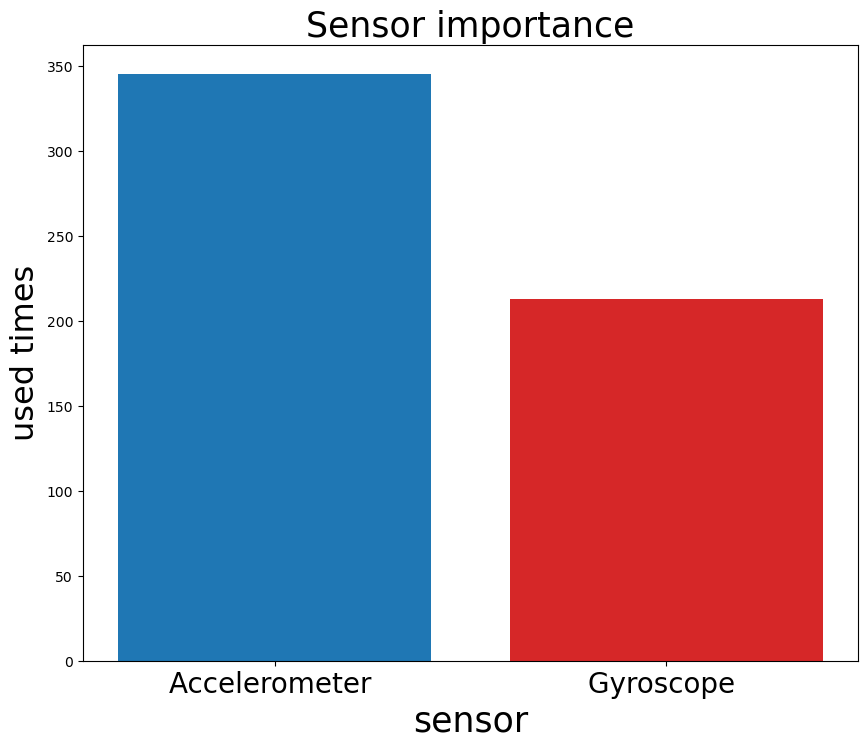

In [11]:
Acc=0
Gyro=0
other=0 
for i in train_data.columns:
    if'Acc'in i:
        Acc += 1
    elif'Gyro'in i:
        Gyro += 1
    else:
        other += 1
        
plt.figure(figsize=(10, 8))
plt.bar(x = ['Accelerometer ','Gyroscope '], height = [Acc,Gyro], color=['tab:blue', 'tab:red'])
plt.title("Sensor importance", fontsize = 25)
plt.xlabel("sensor", size=25)
plt.ylabel("used times", size=23)
plt.xticks(fontsize=20)
plt.show()

the most used sensor is accelerometer

Exploring angle between x and gravity

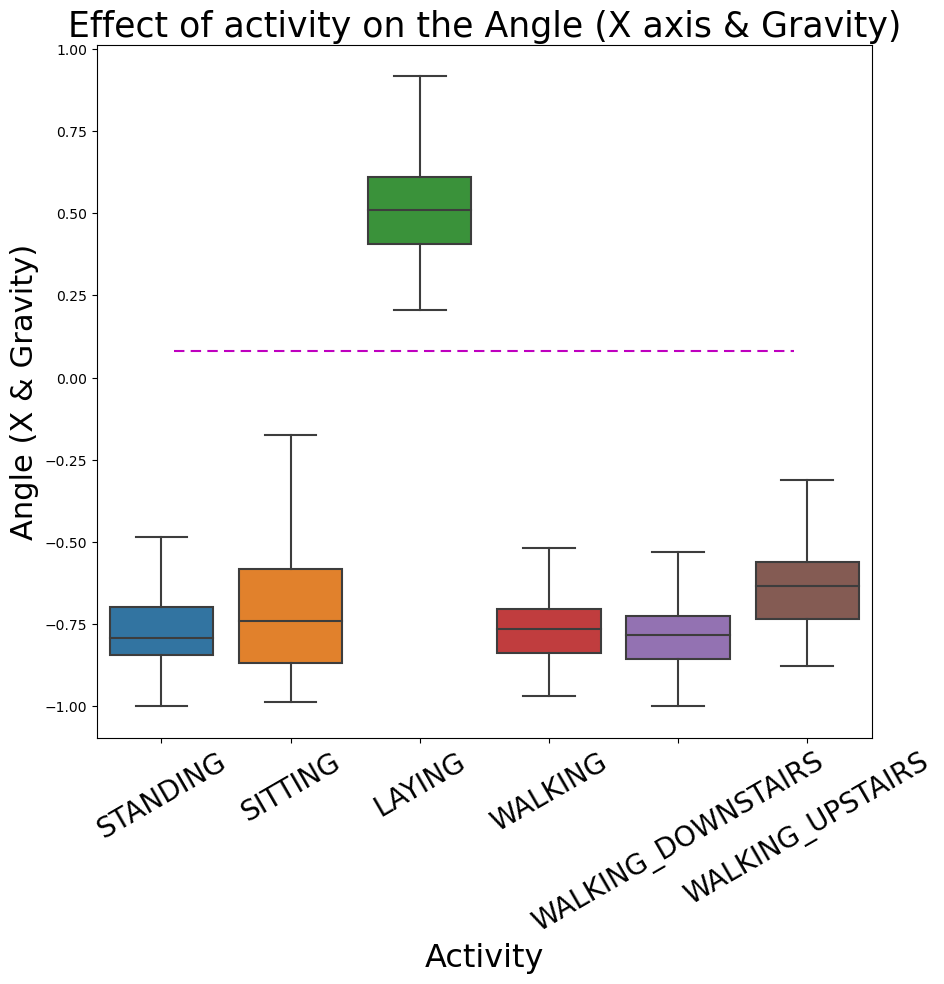

In [12]:
plt.figure(figsize=(10,9))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train_data, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Effect of activity on the Angle (X axis & Gravity)', fontsize=25)
plt.xlabel("Activity", size=23)
plt.ylabel('Angle (X & Gravity)', size=22)
plt.xticks(rotation = 30, fontsize = 20)
plt.show()

Observations:If angle(X,gravityMean) > 0 then Activity is Laying

Check number of activites per subject

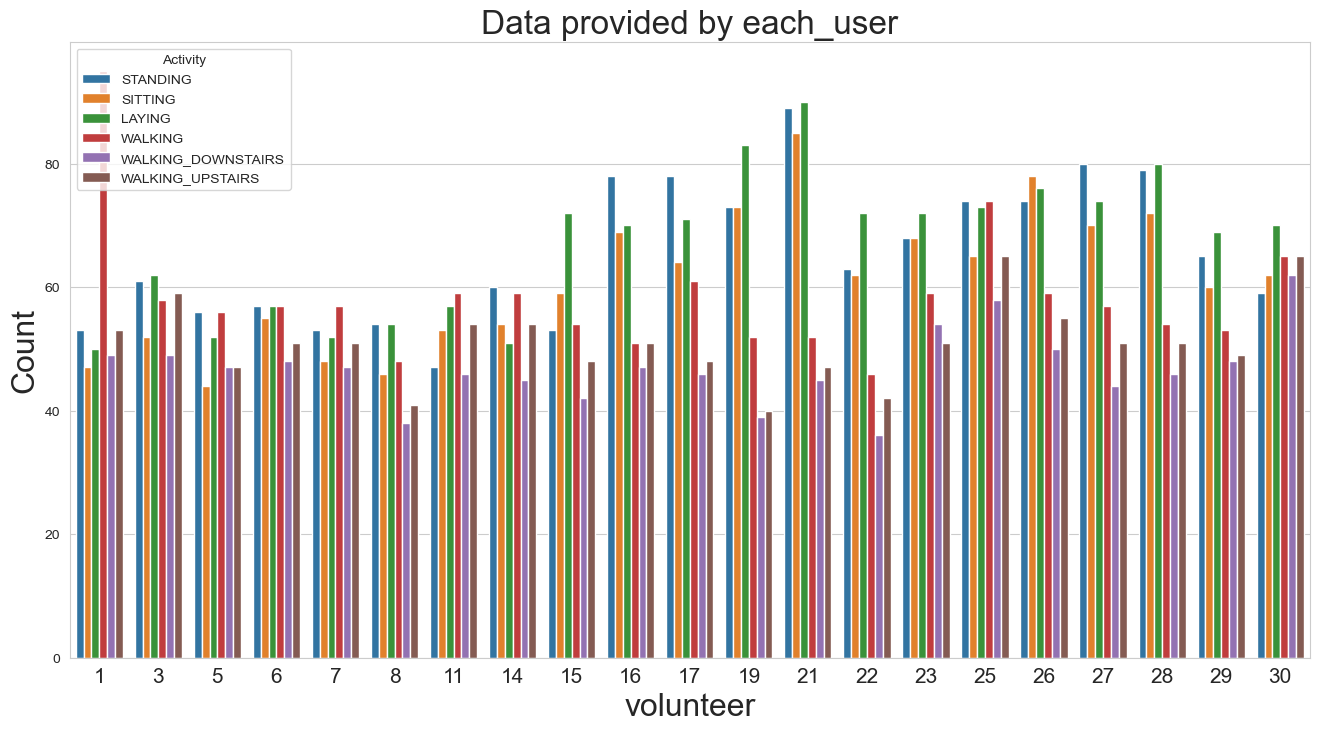

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.color_palette("tab10")
plt.title('Data provided by each_user', fontsize=24)
sns.countplot(x='subject',hue='Activity', data = train_data)
plt.xlabel("volunteer", size=23)
plt.ylabel("Count", size=23)
plt.xticks(size=15)
plt.show()

Observations: Each activities are almost same for all volunteers

Check number of data points per class

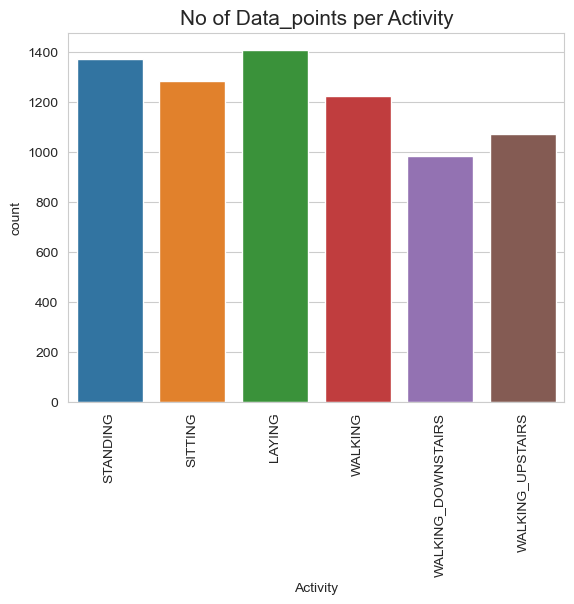

In [14]:
plt.title('No of Data_points per Activity', fontsize=15)
sns.countplot(train_data.Activity) # count plot gives count of each activity
plt.xticks(rotation=90)
plt.show()

Observation: All activities is almost balanced

# Visualizing distribution of Stationary and Moving activities

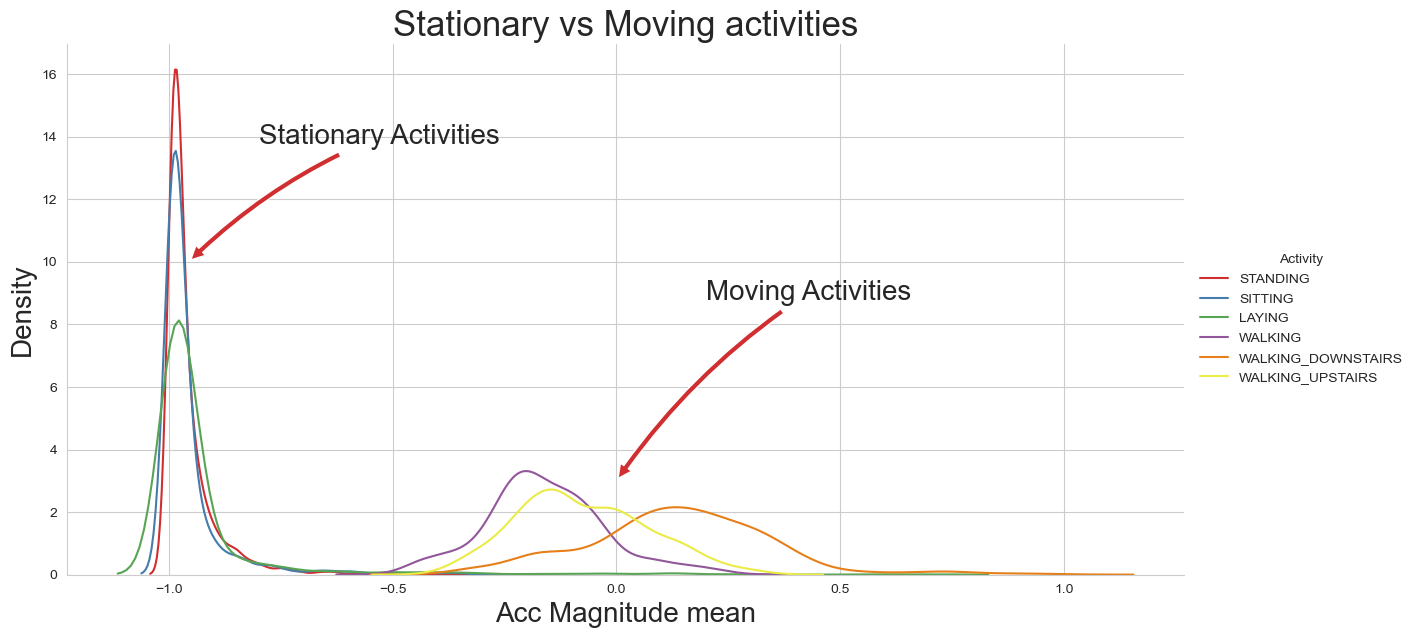

In [15]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train_data, hue='Activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,10), xytext=(-0.8, 14), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.title('Stationary vs Moving activities', fontsize=25)
plt.xlabel("Acc Magnitude mean", size=20)
plt.ylabel('Density', size=20)
plt.show()

Observation: From above plot, for dynamic activites 'tBodyAccMagmean' features value is more than -0.5. So that we can easily distinguish stationary activities and moving activities

In [16]:
train_data['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

Observations:

If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying

If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs

If tAccMean > 0.0 then the Activity is WalkingDownstairs
Here,the activities were splitted into 2 groups 

# Checking imbalance

In [17]:
fig = px.pie(train_data, names='Activity',width=980)
fig.update_layout(
    title={
        'text': "Activities distribution in the data",
        'y':0.95,
        'x':0.40,
        'xanchor': 'center',
        'yanchor': 'top'},
         legend_title ="Activities",
         font=dict(
         family="Arial",
         size=18))
fig.show()

conclusion:balanced data 

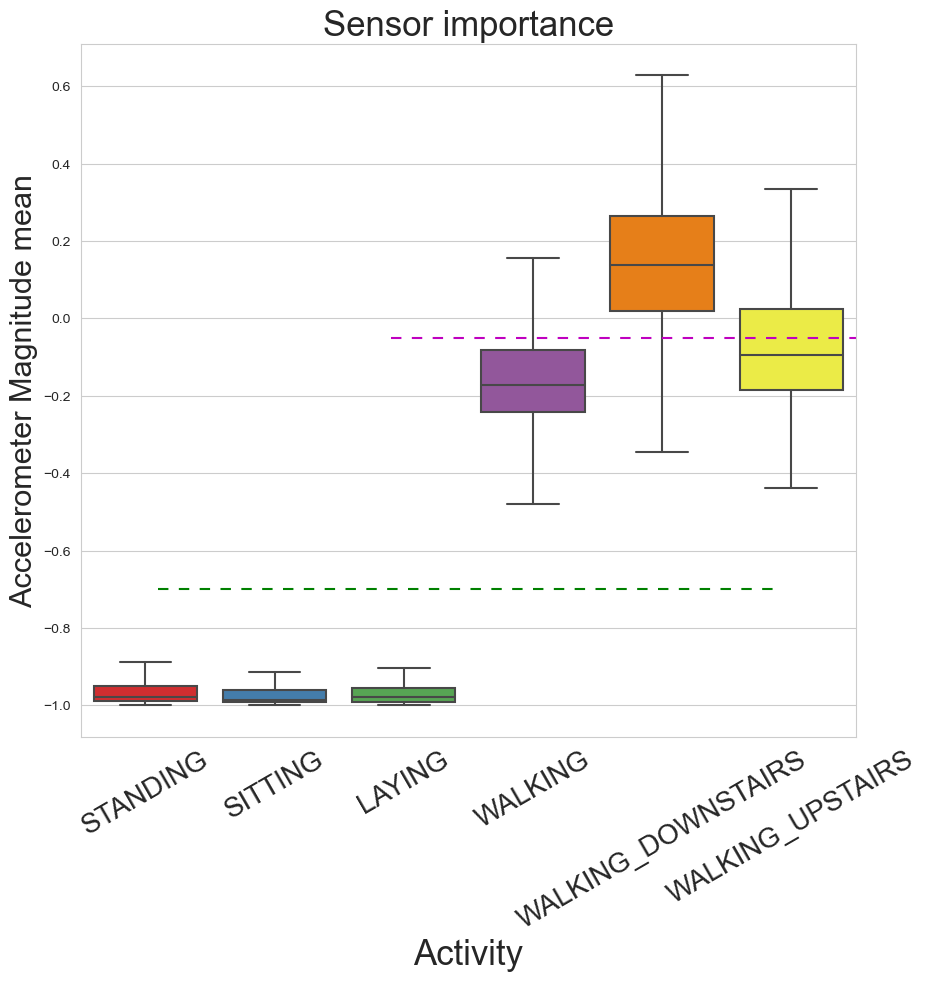

In [18]:
plt.figure(figsize=(10,9))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=train_data, showfliers=False, saturation=1)
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.title("Sensor importance", fontsize = 25)
plt.xlabel("Activity", size=25)
plt.ylabel('Accelerometer Magnitude mean', size=22)
plt.xticks(rotation=30, fontsize=20)
plt.show()

Observations:
    
If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
If tAccMean > 0.0 then the Activity is WalkingDownstairs.
We can classify 75% the Acitivity labels with some errors

In [19]:
columns = train_data.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train_data.columns = columns
test_data.columns = columns

In [20]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train_data[train_data['Activity']=='WALKING']
df2 = train_data[train_data['Activity']=='WALKING_UPSTAIRS']
df3 = train_data[train_data['Activity']=='WALKING_DOWNSTAIRS']
df4 = train_data[train_data['Activity']=='SITTING']
df5 = train_data[train_data['Activity']=='STANDING']
df6 = train_data[train_data['Activity']=='LAYING']

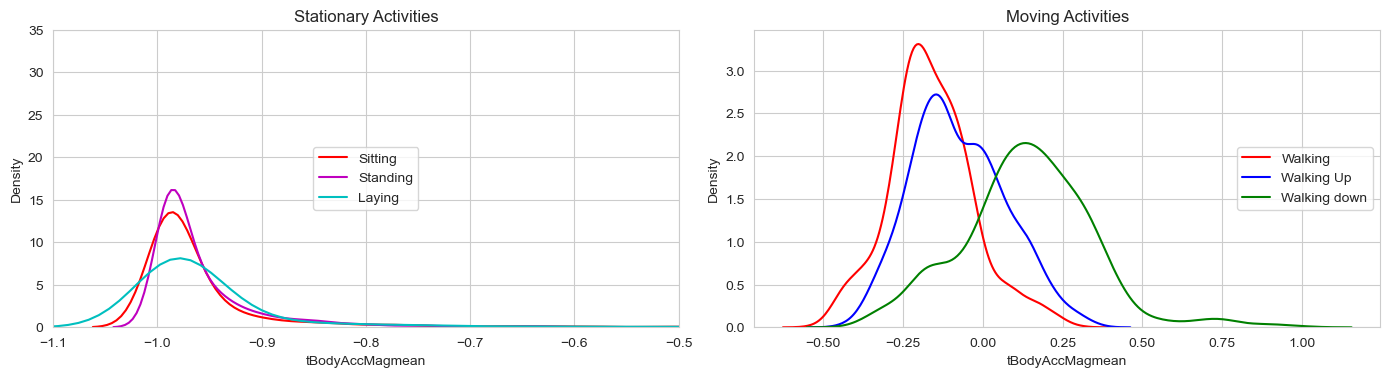

In [21]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1) # plot subplots
plt.title('Stationary Activities')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying') # plot all stationary activities
plt.axis([-1.1, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down') # plot all moving activities
plt.legend(loc='center right')

plt.tight_layout()
plt.show()

# Visualizing data after reducing dimentions with T-SNE

In [22]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')

In [23]:
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html


performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.000s...
[t-SNE] Computed neighbors for 7352 samples in 3.501s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.109s
[t-SNE] Iteration 50: error = 114.0501022, gradient norm = 0.0226565 (50 iterations in 3.446s)
[t-SNE] Iteration 100: error = 97.4315338, gradient norm = 0.0145853 (50 iterations in 

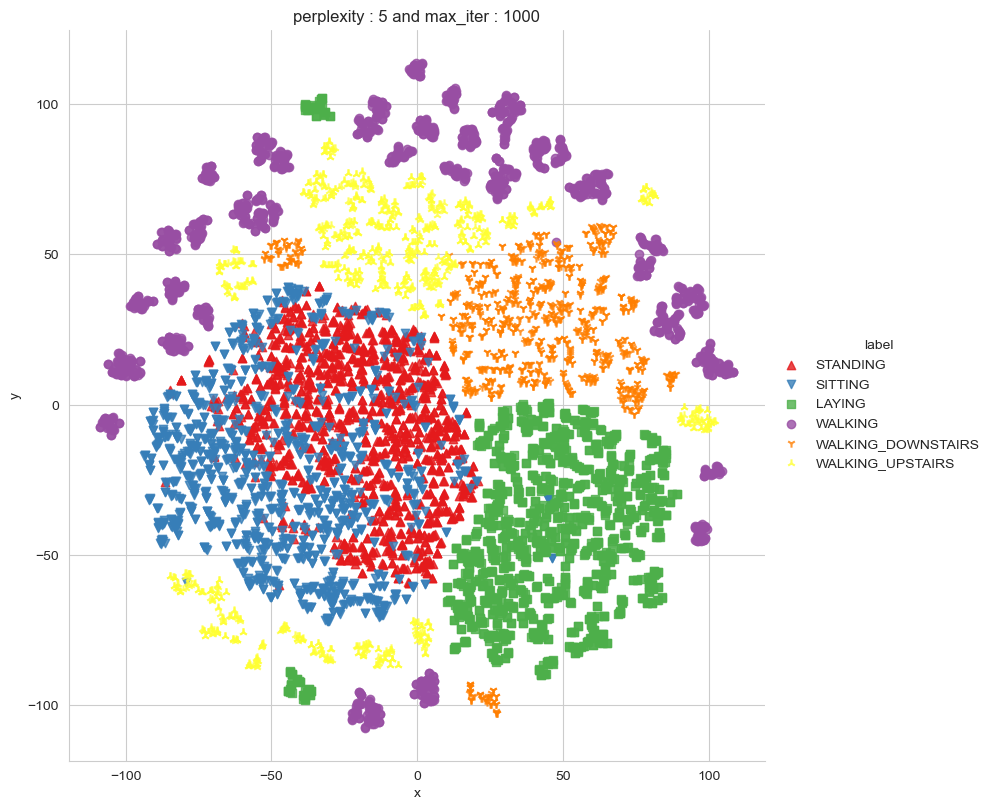

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.011s...
[t-SNE] Computed neighbors for 7352 samples in 3.450s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.172s
[t-SNE] Iteration 50: error = 105.9867477, gradient norm = 0.0155599 (50 iterations in 4.213s)
[t-SNE] Iteration 100: error = 90.5113373, gradient norm = 0.0106652 (50 iteratio

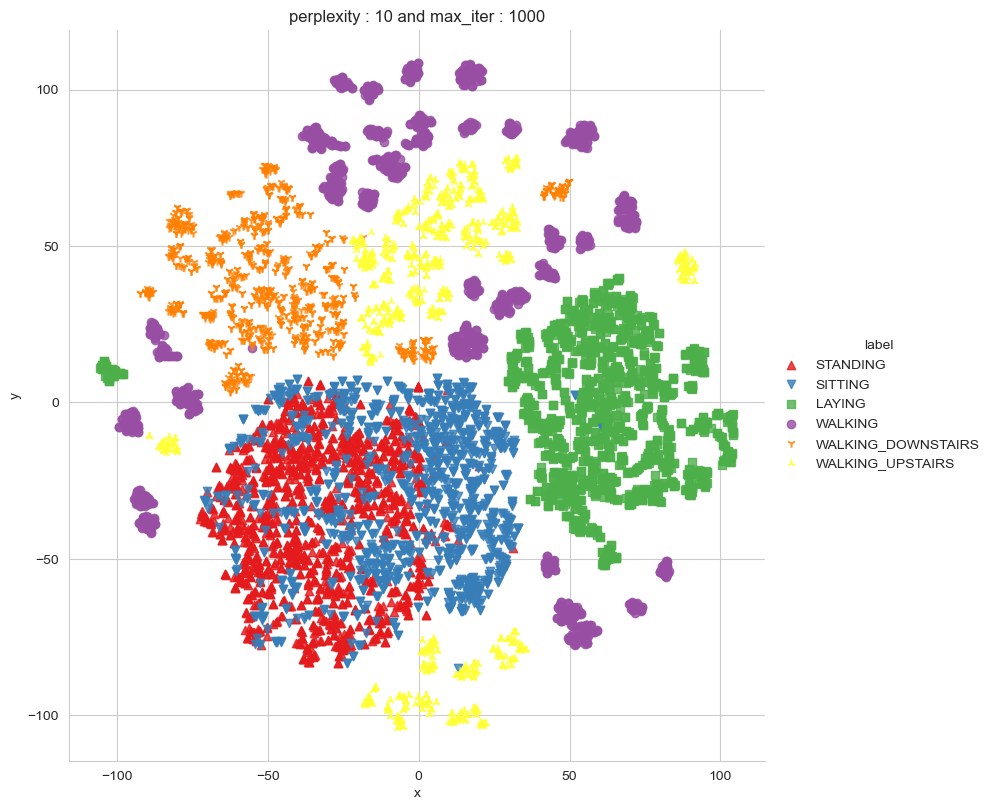

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.000s...
[t-SNE] Computed neighbors for 7352 samples in 3.421s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.324s
[t-SNE] Iteration 50: error = 97.8382874, gradient norm = 0.0138689 (50 iterations in 4.251s)
[t-SNE] Iteration 100: error = 83.9649887, gradient norm = 0.0071226 (50 iteration

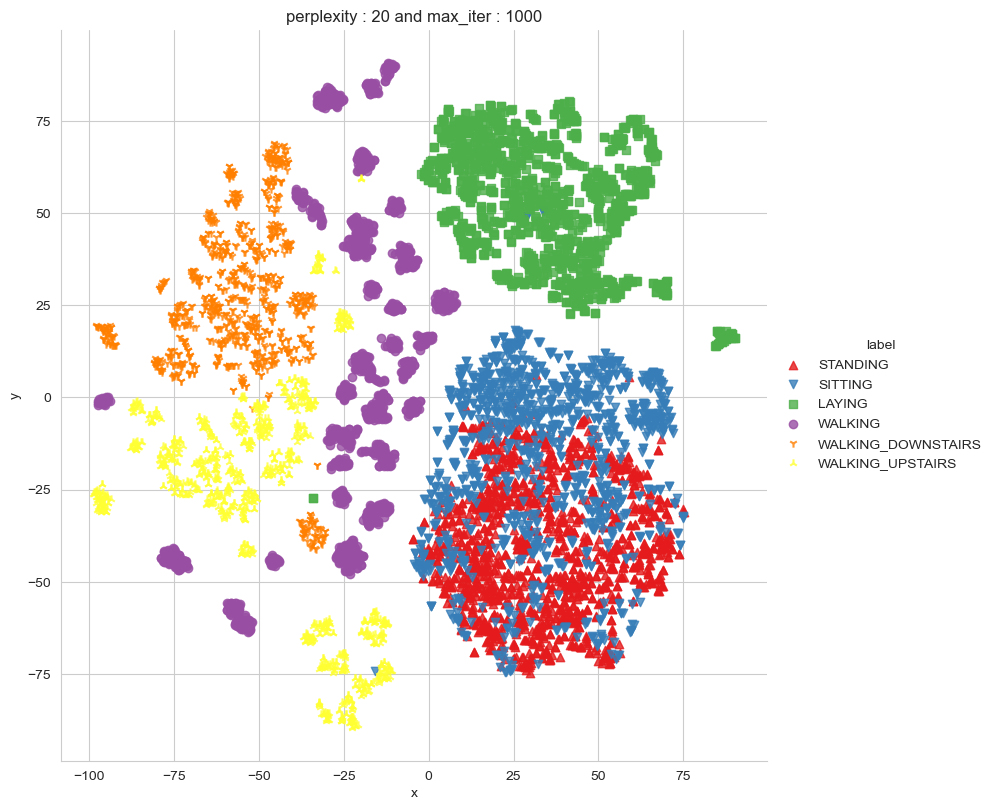

Done


In [24]:
X_pre_tsne = train_data.drop(['subject', 'Activity'], axis=1)
y_pre_tsne = train_data['Activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[5,10,20])

# Principal Component Analysis

In [25]:
data = pd.concat([train_data, test_data])
data = train_data.sample(frac=1)
f_df = data.loc[:, data.columns.str.contains('^f|^s|^a|^A')]
t_df = data.loc[:, data.columns.str.contains('^t|^s|^a|^A')]

X = data.drop(['subject', 'Activity'], axis=1)
y = data['Activity']

X_f = f_df.drop(['subject', 'Activity'], axis=1)
y_f = f_df['Activity']

X_t = t_df.drop(['subject', 'Activity'], axis=1)
y_t = t_df['Activity']

In [26]:
pca = PCA(n_components=0.99)
pca.fit(X)
x_reduced = pca.transform(X)

print('Frequency components number is {} Time components number is {}'.format(X_f.shape[1], X.shape[1] - X_f.shape[1]))
print('Original number of features {} Reduced number of features {}'.format(X.shape[1], x_reduced.shape[1]))

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduced, y, test_size=0.2, shuffle=True, random_state=42)
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.2, shuffle=True, random_state=42)
x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size=0.2, shuffle=True, random_state=42)

Frequency components number is 296 Time components number is 265
Original number of features 561 Reduced number of features 155


In [27]:
y_train

3509                LAYING
6347                LAYING
480     WALKING_DOWNSTAIRS
5331               SITTING
1670                LAYING
               ...        
1096               WALKING
5692              STANDING
5152                LAYING
5804               WALKING
1073                LAYING
Name: Activity, Length: 5881, dtype: object

# Modeling

In [28]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train), average='micro')
    test_precision = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train), average='micro')
    test_recall = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'DOWNSTAIRS',
       'UPSTAIRS'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

# Logistic Regression

Training Accuracy Logistic Regression 98.9797653460296  Test Accuracy Logistic Regression 98.91230455472467
Training Precesion Logistic Regression 98.9797653460296  Test Precesion Logistic Regression 98.91230455472467
Training Recall Logistic Regression 98.9797653460296  Test Recall Logistic Regression 98.91230455472467


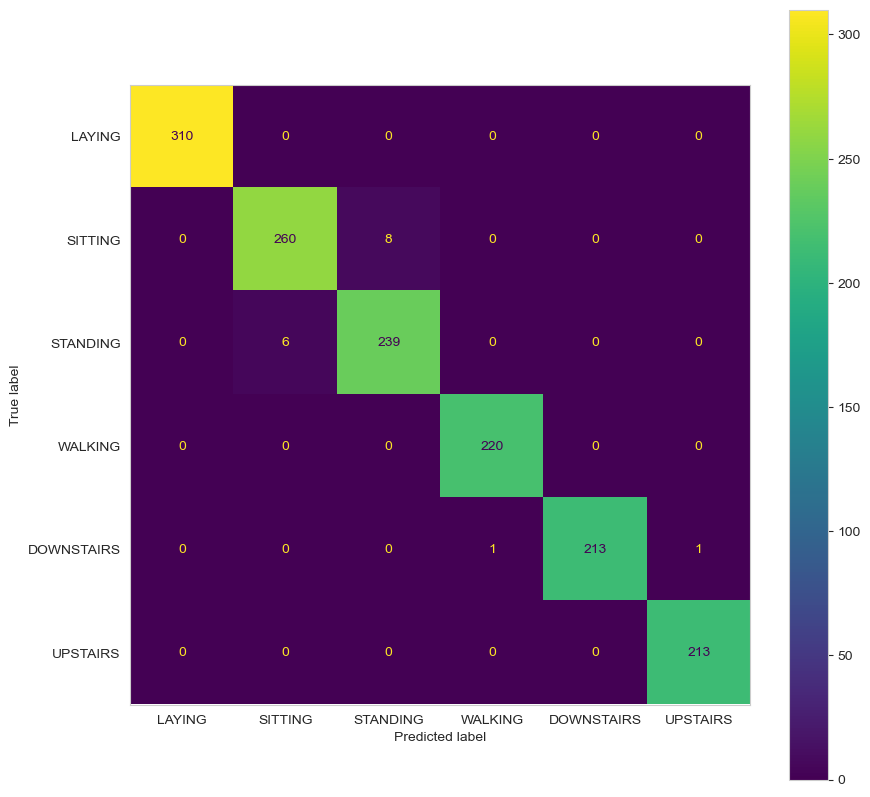

In [29]:
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

# Linear Discriminant Analysis

Training Accuracy LinearDiscriminantAnalysis 98.58867539534093  Test Accuracy LinearDiscriminantAnalysis 98.84432358939496
Training Precesion LinearDiscriminantAnalysis 98.58867539534093  Test Precesion LinearDiscriminantAnalysis 98.84432358939496
Training Recall LinearDiscriminantAnalysis 98.58867539534093  Test Recall LinearDiscriminantAnalysis 98.84432358939496


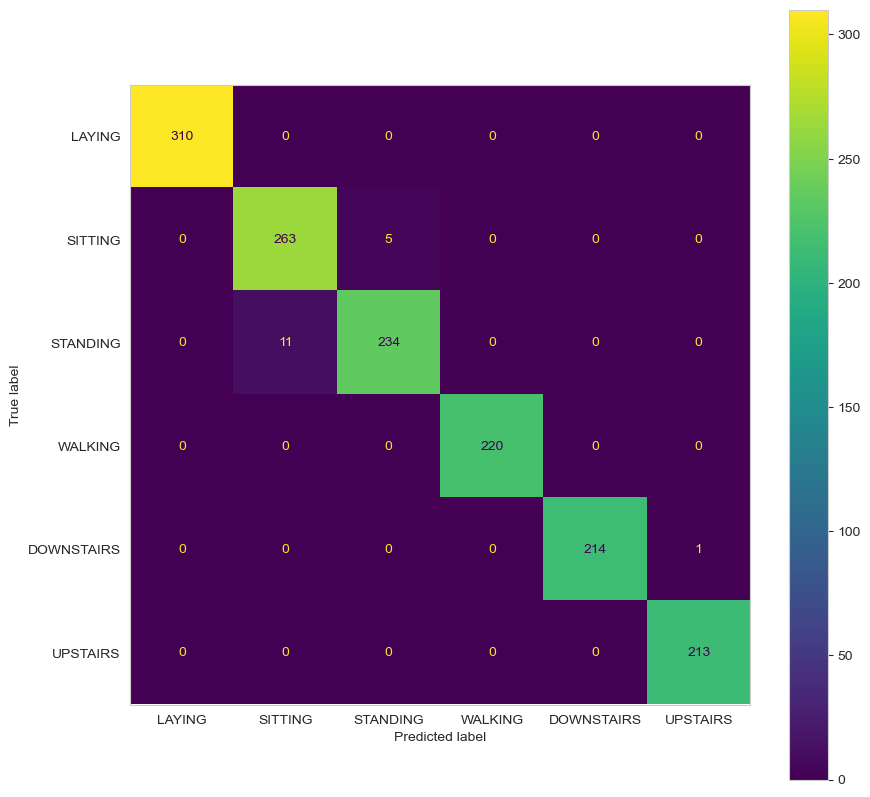

In [30]:
lda = LinearDiscriminantAnalysis().fit(x_train, y_train)
evaluate_classification(lda, "LinearDiscriminantAnalysis", x_train, x_test, y_train, y_test)

# k-nearest neighbors

Training Accuracy KNeighborsClassifier 95.37493623533413  Test Accuracy KNeighborsClassifier 94.42556084296398
Training Precesion KNeighborsClassifier 95.37493623533413  Test Precesion KNeighborsClassifier 94.42556084296398
Training Recall KNeighborsClassifier 95.37493623533413  Test Recall KNeighborsClassifier 94.42556084296398


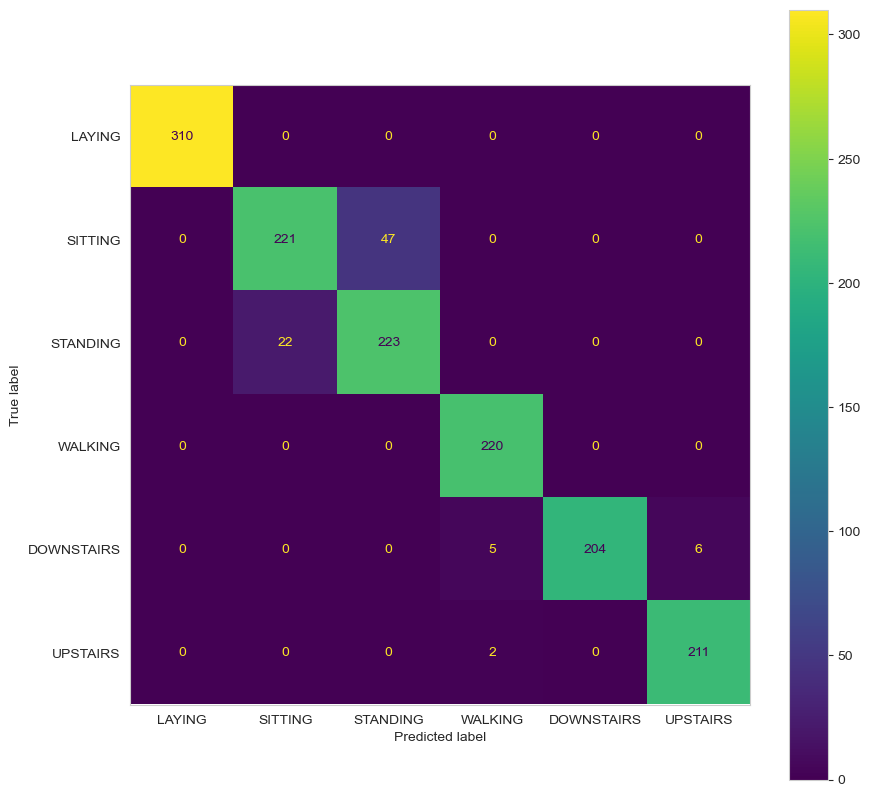

In [31]:
knn = KNeighborsClassifier(n_neighbors=30).fit(x_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", x_train, x_test, y_train, y_test)

# Naive Bayes

Training Accuracy GaussianNB 71.58646488692399  Test Accuracy GaussianNB 68.1849082256968
Training Precesion GaussianNB 71.58646488692399  Test Precesion GaussianNB 68.1849082256968
Training Recall GaussianNB 71.58646488692399  Test Recall GaussianNB 68.1849082256968


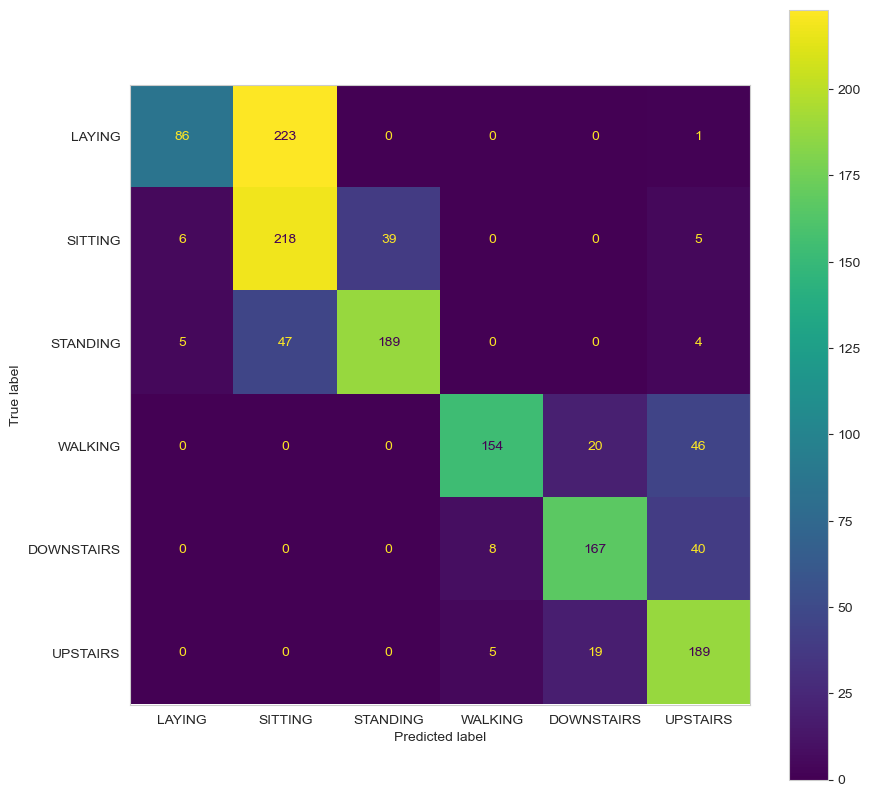

In [32]:
gnb = GaussianNB().fit(x_train, y_train)
evaluate_classification(gnb, "GaussianNB", x_train, x_test, y_train, y_test)

# Support Vector Machines

Training Accuracy Linear SVC(LBasedImpl) 99.31984356401972  Test Accuracy Linear SVC(LBasedImpl) 98.84432358939496
Training Precesion Linear SVC(LBasedImpl) 99.31984356401972  Test Precesion Linear SVC(LBasedImpl) 98.84432358939496
Training Recall Linear SVC(LBasedImpl) 99.31984356401972  Test Recall Linear SVC(LBasedImpl) 98.84432358939496


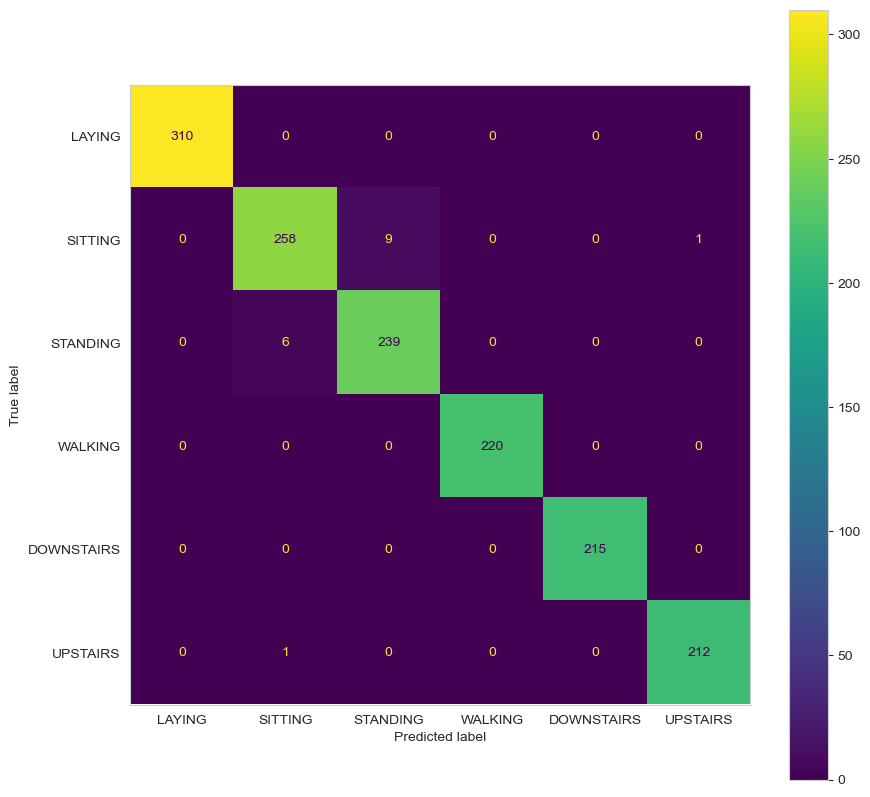

In [33]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", x_train, x_test, y_train, y_test)

Training Accuracy RBF SVC 97.56844074137051  Test Accuracy RBF SVC 97.2807613868117
Training Precesion RBF SVC 97.56844074137051  Test Precesion RBF SVC 97.2807613868117
Training Recall RBF SVC 97.56844074137051  Test Recall RBF SVC 97.2807613868117


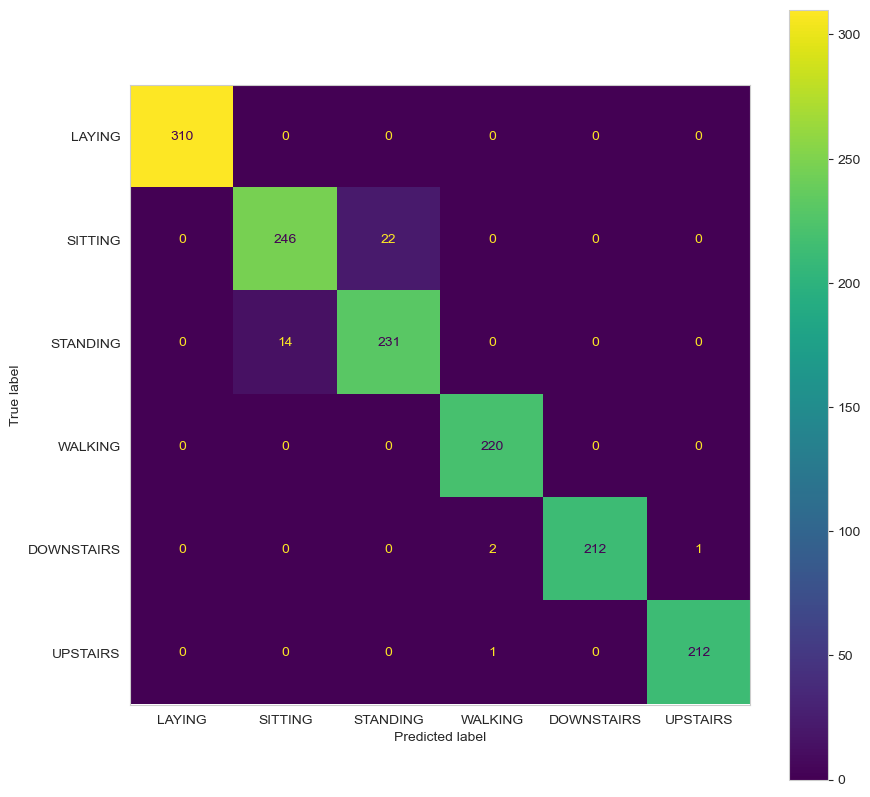

In [34]:
rbf = svm.SVC(kernel='rbf').fit(x_train, y_train)
evaluate_classification(rbf, "RBF SVC", x_train, x_test, y_train, y_test)

# Decision Tree

Training Accuracy DecisionTreeClassifier 100.0  Test Accuracy DecisionTreeClassifier 94.22161794697485
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 94.22161794697485
Training Recall DecisionTreeClassifier 100.0  Test Recall DecisionTreeClassifier 94.22161794697485


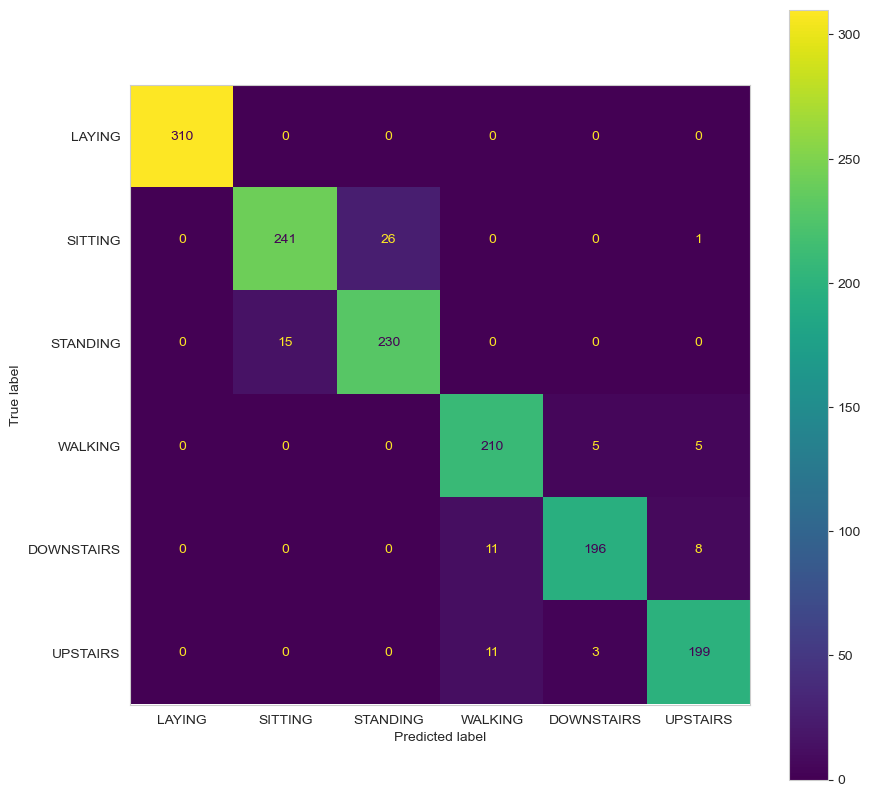

In [35]:
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

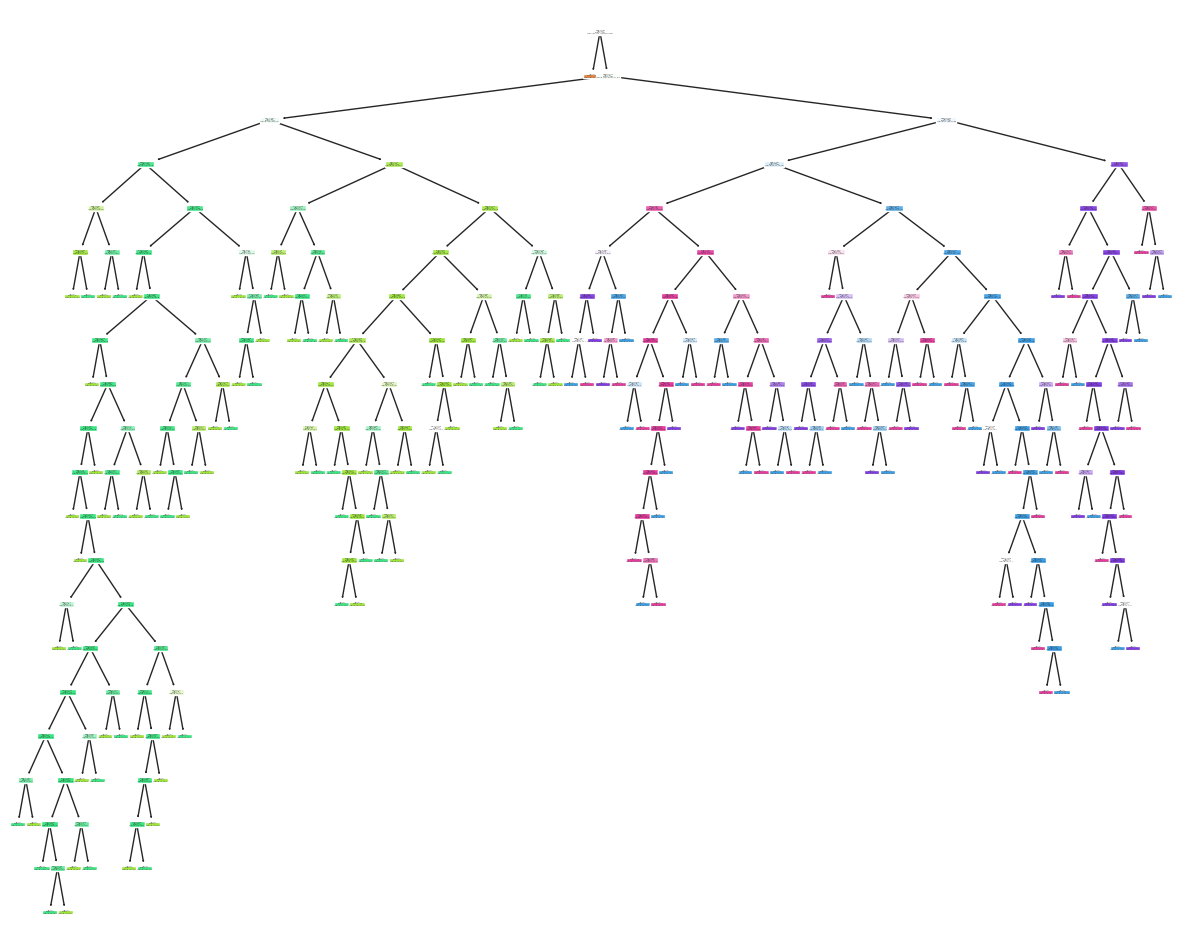

In [36]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(tdt , filled=True)
plt.show()

# RandomForest Classifier

Training Accuracy RandomForestClassifier 100.0  Test Accuracy RandomForestClassifier 97.89259007477906
Training Precesion RandomForestClassifier 100.0  Test Precesion RandomForestClassifier 97.89259007477906
Training Recall RandomForestClassifier 100.0  Test Recall RandomForestClassifier 97.89259007477906


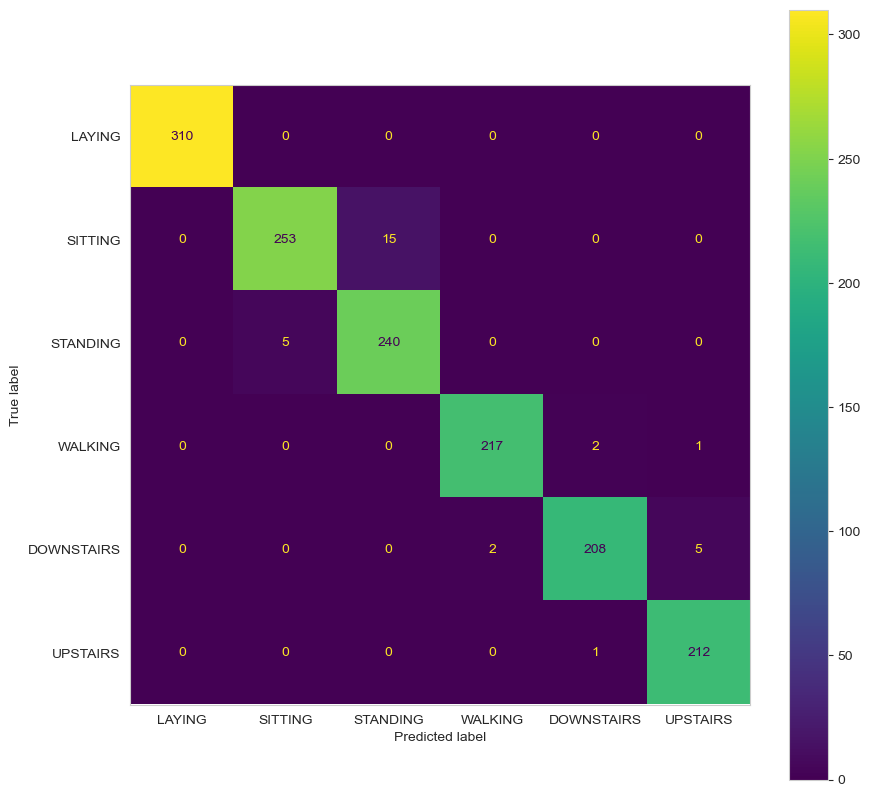

In [37]:
rf = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification(rf, "RandomForestClassifier", x_train, x_test, y_train, y_test)

# Overall  evaluation comparison plot: Accuracy,Precesion & Recall

Accuracy

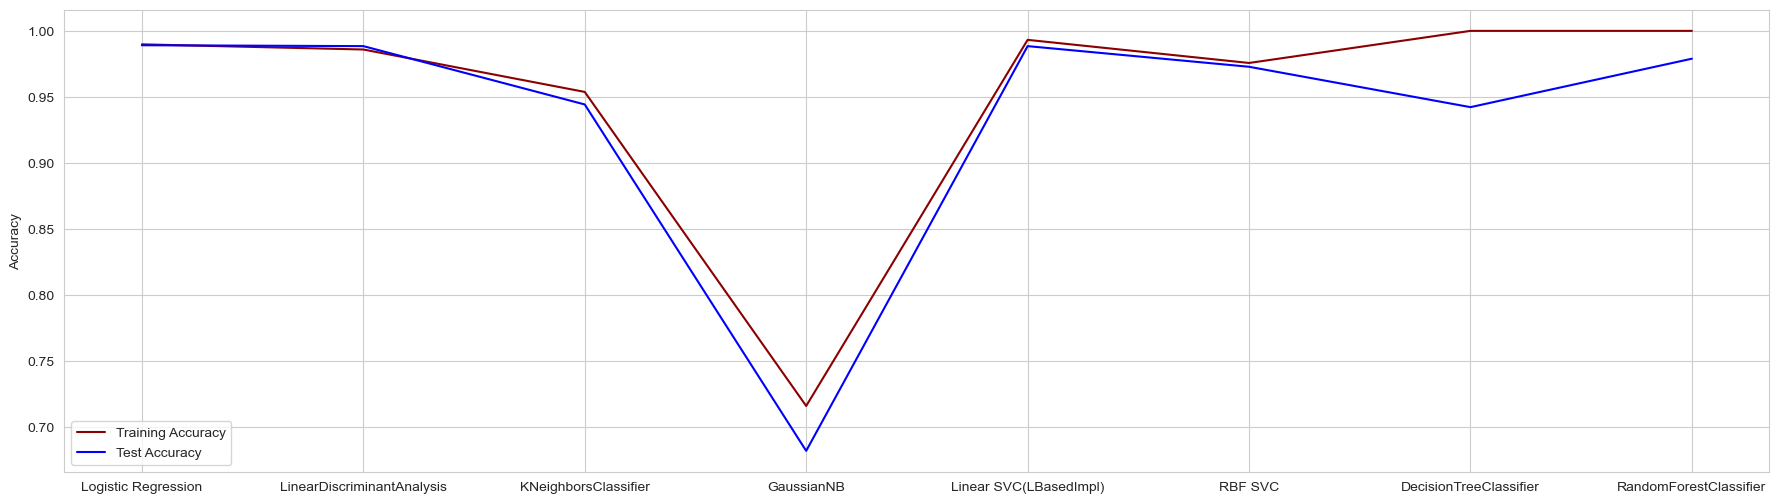

In [38]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(22, 6))
ax.plot(np.arange(len(keys)) , [value[0] for value in values], color='darkred')
ax.plot(np.arange(len(keys)) , [value[1] for value in values], color='b')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.show()

Precesion

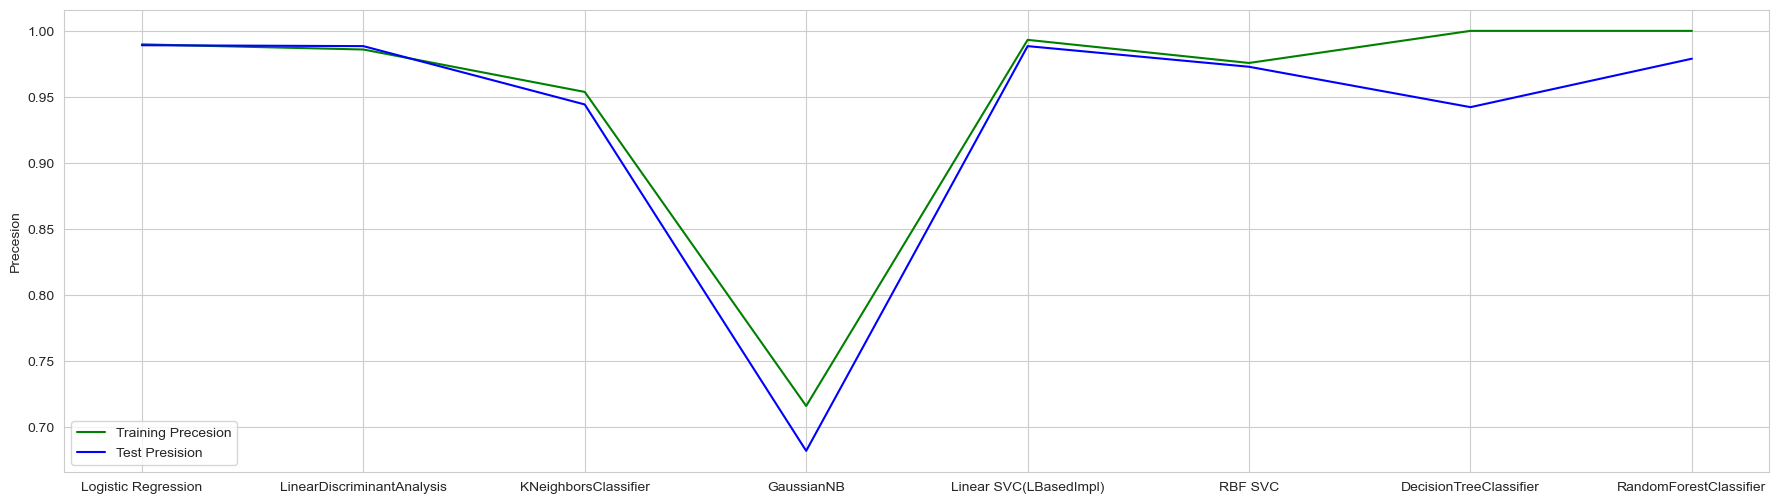

In [39]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(22, 6))
ax.plot(np.arange(len(keys)), [value[2] for value in values], color='g')
ax.plot(np.arange(len(keys)), [value[3] for value in values], color='b')
ax.legend(["Training Precesion", "Test Presision"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Precesion")
plt.show()

Recall

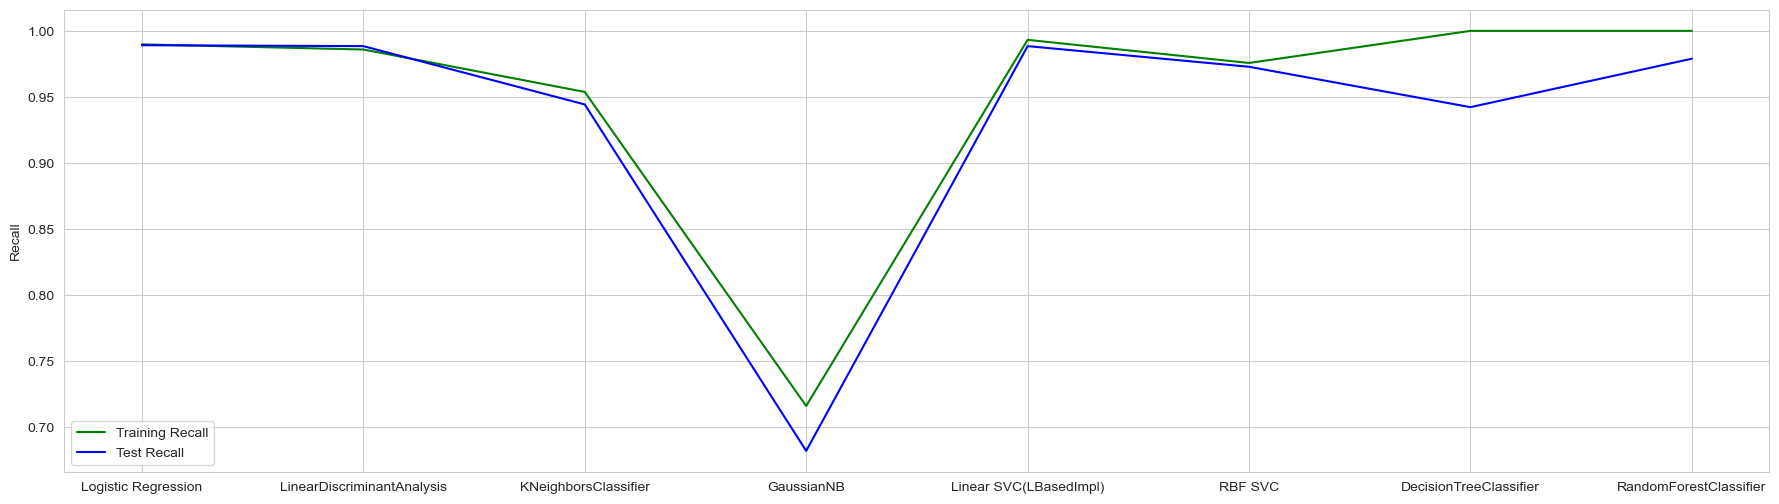

In [40]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(22, 6))
ax.plot(np.arange(len(keys)), [value[4] for value in values], color='g')
ax.plot(np.arange(len(keys)), [value[5] for value in values], color='b')
ax.legend(["Training Recall", "Test Recall"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Recall")
plt.show()

From the evaluation comparison:  linear SVC model is the best 

# Feature reduction: PCA vs manual 

PCA

Training Accuracy Linear SVC(PCA) 99.18381227682367  Test Accuracy Linear SVC(PCA) 98.77634262406526
Training Precesion Linear SVC(PCA) 99.18381227682367  Test Precesion Linear SVC(PCA) 98.77634262406526
Training Recall Linear SVC(PCA) 99.18381227682367  Test Recall Linear SVC(PCA) 98.77634262406526


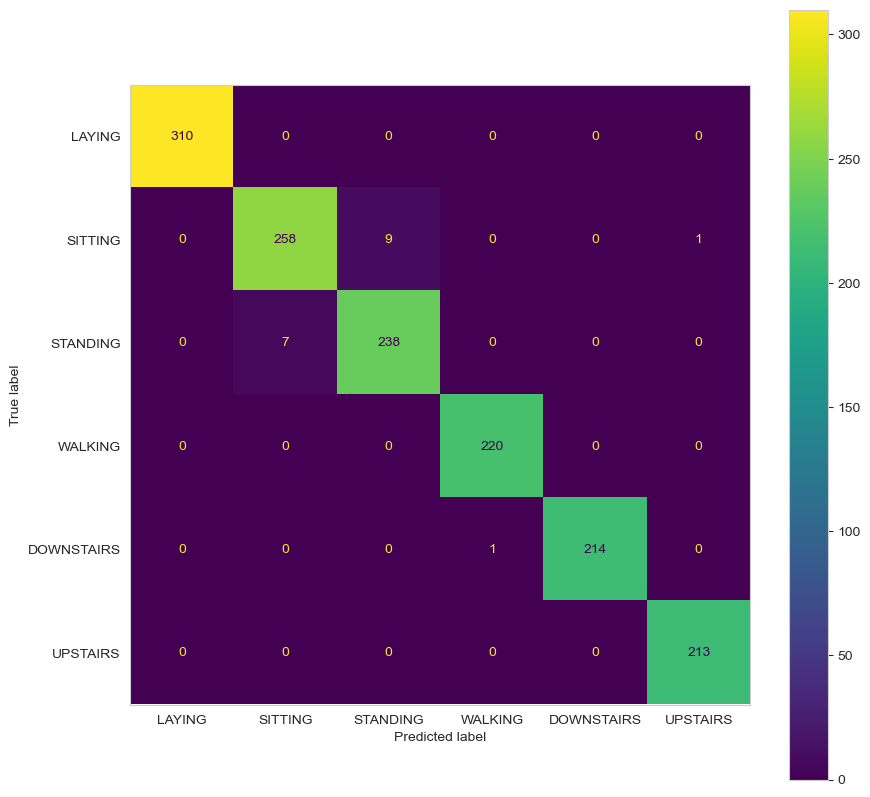

In [41]:
lin_svc_pca = svm.LinearSVC().fit(x_train_pca, y_train_pca)
evaluate_classification(lin_svc_pca,"Linear SVC(PCA)",x_train_pca, x_test_pca, y_train_pca, y_test_pca)

Frequency

Training Accuracy Linear SVC(Frequency) 97.85750722666214  Test Accuracy Linear SVC(Frequency) 97.00883752549286
Training Precesion Linear SVC(Frequency) 97.85750722666214  Test Precesion Linear SVC(Frequency) 97.00883752549286
Training Recall Linear SVC(Frequency) 97.85750722666214  Test Recall Linear SVC(Frequency) 97.00883752549286


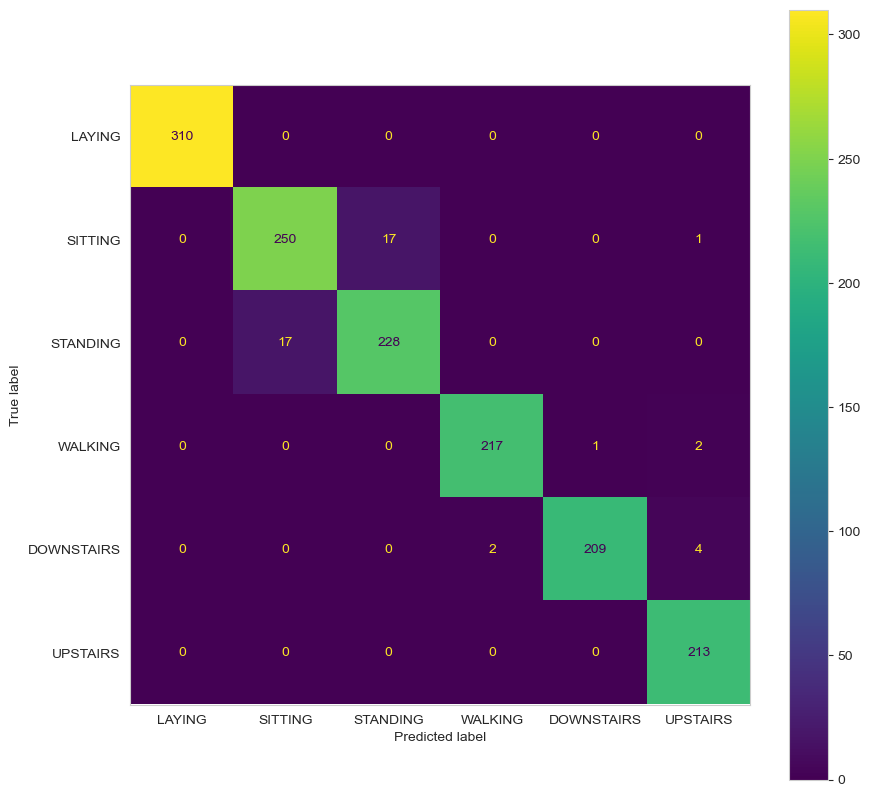

In [42]:
lin_svc_f = svm.LinearSVC().fit(x_train_f, y_train_f)
evaluate_classification(lin_svc_f, "Linear SVC(Frequency)", x_train_f, x_test_f, y_train_f, y_test_f)

Time

Training Accuracy Linear SVC(Time) 99.33684747491924  Test Accuracy Linear SVC(Time) 99.04826648538409
Training Precesion Linear SVC(Time) 99.33684747491924  Test Precesion Linear SVC(Time) 99.04826648538409
Training Recall Linear SVC(Time) 99.33684747491924  Test Recall Linear SVC(Time) 99.04826648538409


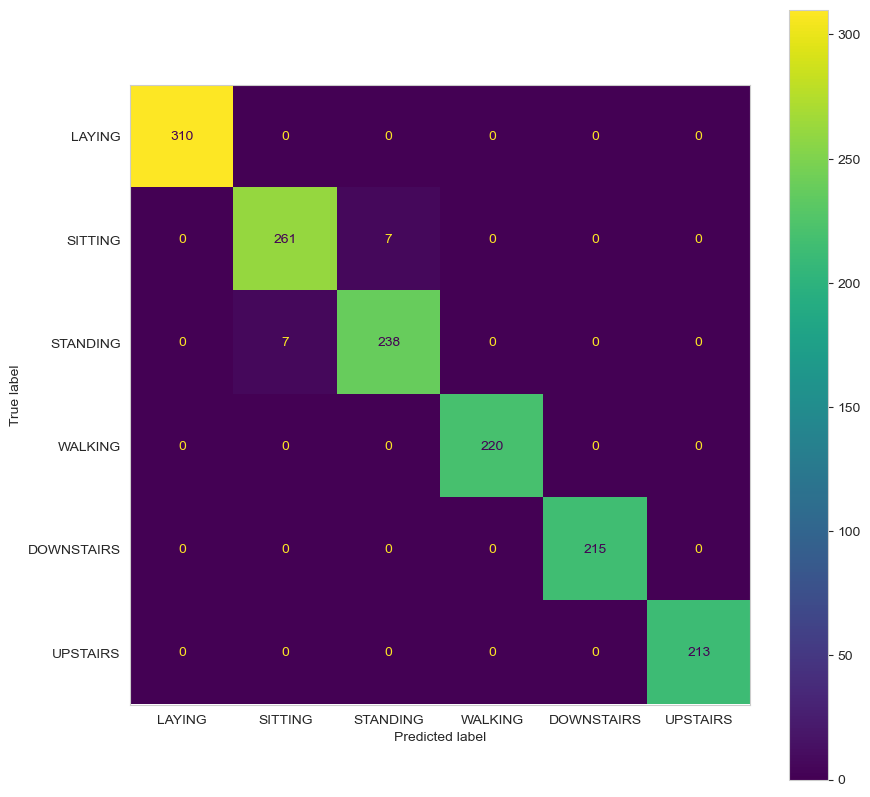

In [43]:
lin_svc_t = svm.LinearSVC().fit(x_train_t, y_train_t)
evaluate_classification(lin_svc_t, "Linear SVC(Time)", x_train_t, x_test_t, y_train_t, y_test_t)

Number of best for Anova is 180
Training Accuracy Linear SVC(K) 98.62268321713994  Test Accuracy Linear SVC(K) 98.57239972807615
Training Precesion Linear SVC(K) 98.62268321713994  Test Precesion Linear SVC(K) 98.57239972807615
Training Recall Linear SVC(K) 98.62268321713994  Test Recall Linear SVC(K) 98.57239972807615


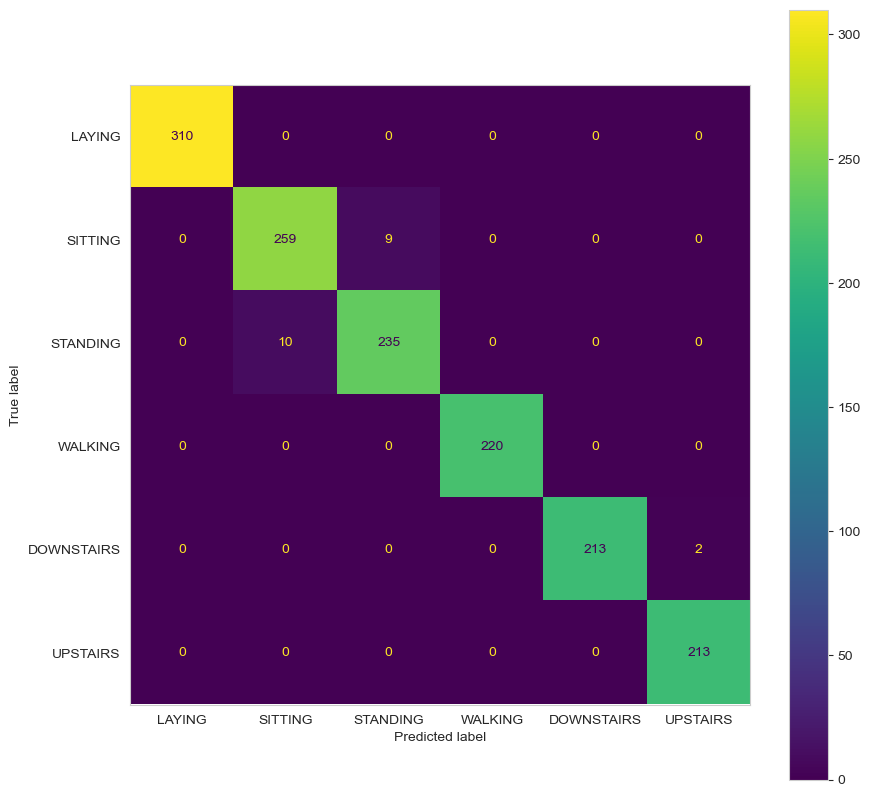

In [44]:
X_f_classif_k = SelectKBest(score_func=f_classif, k=180).fit_transform(X_t,y_t)
print('Number of best for Anova is {}'.format(X_f_classif_k.shape[1]))
x_train_k, x_test_k, y_train_k, y_test_k = train_test_split(X_f_classif_k, y, test_size=0.2, shuffle=True, random_state=42)
lin_svc_k = svm.LinearSVC().fit(x_train_k, y_train_k)
evaluate_classification(lin_svc_k, "Linear SVC(K)", x_train_k, x_test_k, y_train_k, y_test_k)

# evaluation comparison plot: linear SVC model

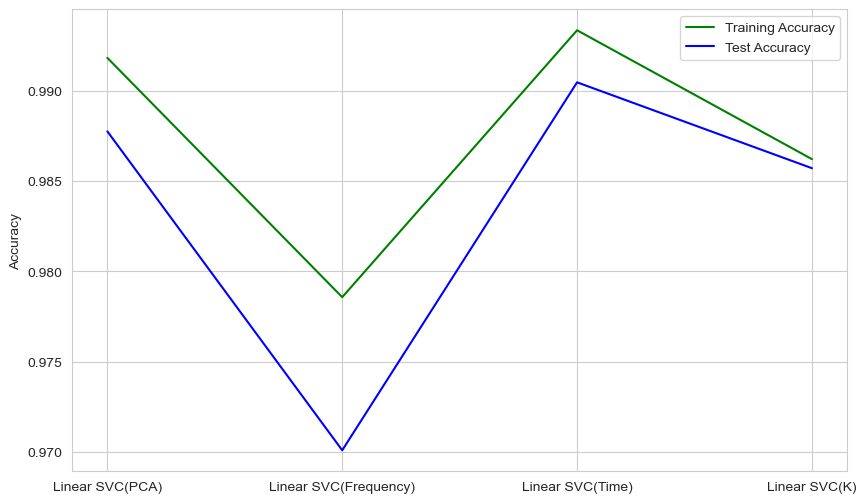

In [45]:
keys = ['Linear SVC(PCA)', 'Linear SVC(Frequency)', 'Linear SVC(Time)', 'Linear SVC(K)']
values = []
for i in keys:
    values.append(kernal_evals[i])
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(len(keys)), [value[0] for value in values], color='g')
ax.plot(np.arange(len(keys)), [value[1] for value in values], color='b')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.show()

# Deep learning model

In [46]:
# import required liabraries for Nueral Network
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation 

In [47]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'activities'.
y_train1 = label_encoder.fit_transform(y_train)
y_test1 = label_encoder.transform(y_test)
 
print(y_train1)
print(y_test1)

[0 0 4 ... 0 3 0]
[5 4 4 ... 4 0 5]


In [48]:
# here we are having a categorical classes for each activity
print("Class label of first activity :", y_train[0])

# lets convert this into a 6 dimensional vector
# ex: consider a activity is "standing" convert it into 2 => [0, 0, 1, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = utils.to_categorical(y_train1, 6) 
Y_test = utils.to_categorical(y_test1, 6)

print("After converting the output into a vector : ",Y_train[0])

Class label of first activity : STANDING
After converting the output into a vector :  [1. 0. 0. 0. 0. 0.]


In [51]:
def Graph_Drawing(history, title):
    x = np.arange(len(history.history["val_accuracy"]))

    plt.plot(x, history.history["loss"], label="loss")
    plt.plot(x, history.history["val_loss"], label="val_loss")

    plt.plot(x, history.history["accuracy"], label="accuracy")
    plt.plot(x, history.history["val_accuracy"], label="val_accuracy")
    
    plt.title(title)

    plt.legend()
    
    plt.show()

In [52]:
import tensorflow as tf
import keras
from keras import layers
from keras.callbacks import EarlyStopping

MODEL training

In [53]:
def MLP_Model(data):
    model = keras.Sequential([
        layers.Input(shape=data.shape[1:]),

        layers.Dense(1000, activation="relu"),
    #         layers.Dropout(0.1),
    #         layers.BatchNormalization(),

        layers.Dense(500, activation="relu"),
    #         layers.Dropout(0.25),
    #         layers.BatchNormalization(),

        layers.Dense(6, activation="sigmoid"),
        ], name="MLP_Sequential")

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    print(model.summary())

    return model

In [54]:
def CNN_Model(data):
    model = keras.Sequential(name="CNN_Sequential")
    print(data.shape[1:])
    model.add( layers.Input(shape=data.shape[1:]) )
    model.add( layers.Conv1D(64, 3, activation="relu", name="conv_1") )
#         layers.Dropout(0.1),
    model.add( layers.Conv1D(32, 3, activation="relu", name="conv_2") )
#         layers.Dropout(0.1),
    
    model.add(layers.Flatten())

    model.add( layers.Dense(64, activation="relu", name="dense_1") )
    model.add( layers.Dense(128, activation="relu", name="dense_2") )
    model.add( layers.Dense(6, activation="softmax", name="output") )
    model.compile(optimizer=tf.keras.optimizers.SGD(), 
                  loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    
    print(model.summary())
    
    return model

In [55]:
def CNN_LSTM_Model(data):
    model = keras.Sequential(name="CNN_Sequential")
    print(data.shape[1:])
    model.add( layers.Input(shape=data.shape[1:]) )
        
    model.add( layers.Conv1D(64, 3, activation="relu", name="conv_1") )
#         layers.Dropout(0.1),
    model.add( layers.Conv1D(32, 3, activation="relu", name="conv_2") )
#         layers.Dropout(0.1),
    
    model.add(layers.LSTM(10, activation="tanh", name="LSTM"))

    model.add( layers.Dense(64, activation="relu", name="dense_1") )
    model.add( layers.Dense(128, activation="relu", name="dense_2") )
    model.add( layers.Dense(6, activation="softmax", name="output") )
    
    model.compile(optimizer=tf.keras.optimizers.SGD(), 
                  loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    
    print(model.summary())
    
    return model

In [56]:
train_features = data.drop(["Activity"], axis=1)
test_features = data.drop(["Activity"], axis=1)

train_labels = data["Activity"].replace(['LAYING','STANDING','SITTING','WALKING', 'WALKING_UPSTAIRS' ,'WALKING_DOWNSTAIRS' ],  [0, 1, 2, 3,4,5])
test_labels = data["Activity"].replace(['LAYING','STANDING','SITTING','WALKING', 'WALKING_UPSTAIRS' ,'WALKING_DOWNSTAIRS' ],  [0, 1, 2, 3,4,5])

print(train_features.shape)
print(test_features.shape)

print(train_labels.shape)
print(test_labels.shape)

(7352, 562)
(7352, 562)
(7352,)
(7352,)


# Multi Layered Perceptron

In [57]:
#Multi Layered Perceptron
mlp_model = MLP_Model(train_features)
mlp_model.summary()

earlystopping = EarlyStopping(patience=30, monitor="val_accuracy", restore_best_weights=True)
mlp_history = mlp_model.fit(train_features, train_labels, epochs=100, callbacks = [earlystopping],
         validation_data=(test_features, test_labels) )

Model: "MLP_Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              563000    
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 6)                 3006      
                                                                 
Total params: 1,066,506
Trainable params: 1,066,506
Non-trainable params: 0
_________________________________________________________________
None
Model: "MLP_Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              563000    
                                                                 
 dense_1 (Den

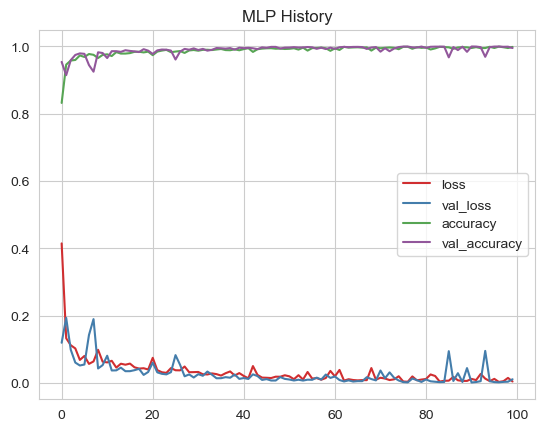

In [58]:
Graph_Drawing(mlp_history, "MLP History")

230/230 [==============================] - 2s 6ms/step


<AxesSubplot:>

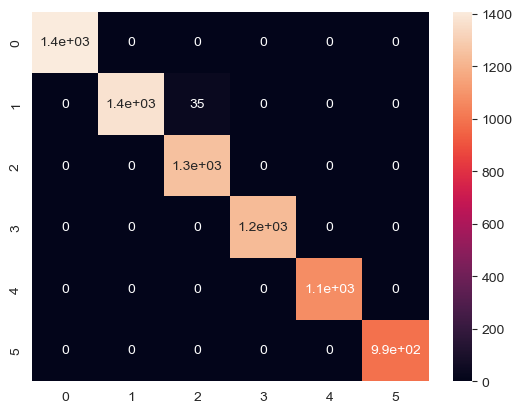

In [59]:
mlp_predict = mlp_model.predict( test_features )
original = test_labels

mlp_predict = np.argmax(mlp_predict, axis=1)
cf = metrics.confusion_matrix(mlp_predict, original)

sns.heatmap(cf, annot=True)

In [60]:
mlp_model.evaluate(test_features, test_labels.replace(np.unique(test_labels),  [0, 1, 2, 3,4,5]))

230/230 [==============================] - 2s 7ms/step - loss: 0.0107 - accuracy: 0.9952


[0.010735850781202316, 0.9952393770217896]

# Convolutional Neural Network

In [100]:
#Convolutional Neural Network
train_features = train_features.reshape(train_features.shape[0], train_features.shape[1], 1)
test_features = test_features.reshape(test_features.shape[0], test_features.shape[1], 1)

In [101]:
cnn_model = CNN_Model(train_features)
cnn_model.summary()

earlystopping = EarlyStopping(patience=30, monitor="val_accuracy", restore_best_weights=True)
cnn_history = cnn_model.fit( train_features,
                            train_labels, epochs=100, callbacks = [earlystopping],
                            validation_data=(test_features, test_labels) )

(36, 1)
Model: "CNN_Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv1D)             (None, 34, 64)            256       
                                                                 
 conv_2 (Conv1D)             (None, 32, 32)            6176      
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 64)                65600     
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 output (Dense)              (None, 6)                 774       
                                                                 
Total params: 81,126
Trainable params: 81,12

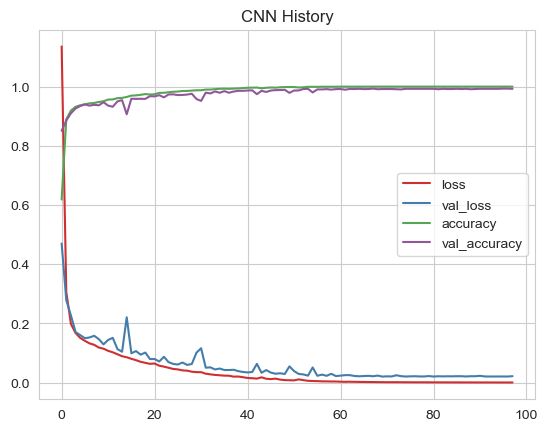

In [102]:
Graph_Drawing(cnn_history, "CNN History")

In [103]:
test_features.shape

(2941, 36, 1)

92/92 [==============================] - 0s 3ms/step


<AxesSubplot:>

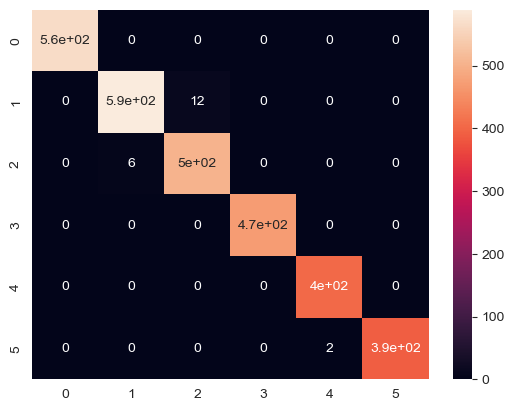

In [104]:
cnn_predict = cnn_model.predict( test_features )
original = test_labels

cnn_predict = np.argmax(cnn_predict, axis=1)
cf = metrics.confusion_matrix(cnn_predict, original)

sns.heatmap(cf, annot=True)

In [105]:
cnn_model.evaluate(test_features, test_labels)

92/92 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9932


[0.021748224273324013, 0.9931995868682861]

# Convolutional Neural Network + Long Short Term Memory Model

In [106]:
#Convolutional Neural Network + Long Short Term Memory Model
cnn_lstm_model = CNN_LSTM_Model(train_features)
cnn_lstm_model.summary()

earlystopping = EarlyStopping(patience=30, monitor="val_accuracy", restore_best_weights=True)
cnn_lstm_history = cnn_lstm_model.fit( train_features,
                            train_labels, epochs=100, callbacks = [earlystopping],
                            validation_data=(test_features, test_labels) )

(36, 1)
Model: "CNN_Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv1D)             (None, 34, 64)            256       
                                                                 
 conv_2 (Conv1D)             (None, 32, 32)            6176      
                                                                 
 LSTM (LSTM)                 (None, 10)                1720      
                                                                 
 dense_1 (Dense)             (None, 64)                704       
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 output (Dense)              (None, 6)                 774       
                                                                 
Total params: 17,950
Trainable params: 17,95

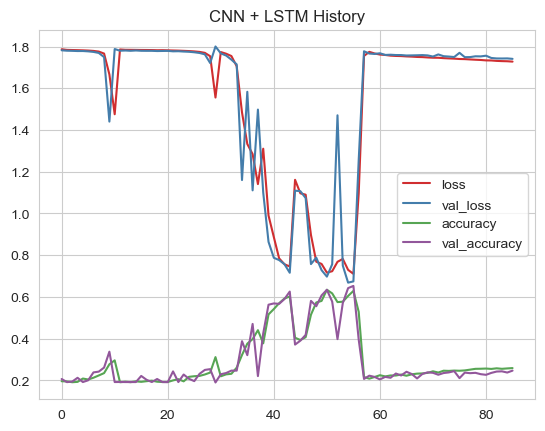

In [107]:
Graph_Drawing(cnn_lstm_history, "CNN + LSTM History")

92/92 [==============================] - 1s 6ms/step


<AxesSubplot:>

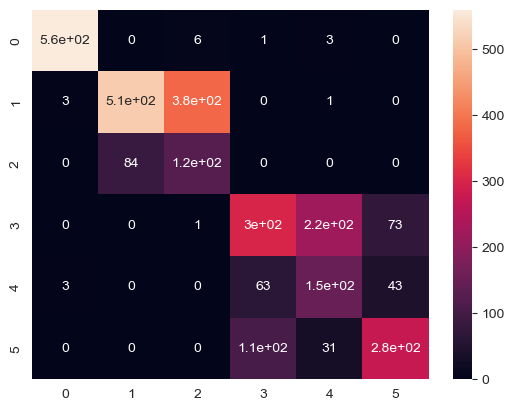

In [108]:
cnn_lstm_predict = cnn_lstm_model.predict( test_features )
original = test_labels

cnn_lstm_predict = np.argmax(cnn_lstm_predict, axis=1)
cf = metrics.confusion_matrix(cnn_lstm_predict, original)

sns.heatmap(cf, annot=True)

In [109]:
cnn_lstm_model.evaluate(test_features, test_labels)

92/92 [==============================] - 1s 6ms/step - loss: 0.6745 - accuracy: 0.6528


[0.6745038628578186, 0.652839183807373]

# Training Models (Selected Features)

In [79]:
train_features = data.drop(["Activity"], axis=1)
test_features = data.drop(["Activity"], axis=1)

In [80]:
features = pd.concat([train_features, test_features], axis=0, ignore_index=False)
labels = pd.concat([train_labels, test_labels], axis=0, ignore_index=False)

features = PCA(n_components=36).fit_transform(features, labels)

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, train_size=0.8, random_state=2)

In [81]:
train_features.shape

(11763, 36)

In [82]:
test_features.shape

(2941, 36)

In [83]:
train_labels.shape

(11763,)

In [84]:
test_labels.shape

(2941,)

# Multi Layered Perceptron

In [85]:
#Multi Layered Perceptron
mlp_model = MLP_Model(train_features)
mlp_model.summary()

earlystopping = EarlyStopping(patience=30, monitor="val_accuracy", restore_best_weights=True)
mlp_history = mlp_model.fit(train_features, train_labels, epochs=100, callbacks = [earlystopping],
         validation_data=(test_features, test_labels) )

Model: "MLP_Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1000)              37000     
                                                                 
 dense_4 (Dense)             (None, 500)               500500    
                                                                 
 dense_5 (Dense)             (None, 6)                 3006      
                                                                 
Total params: 540,506
Trainable params: 540,506
Non-trainable params: 0
_________________________________________________________________
None
Model: "MLP_Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1000)              37000     
                                                                 
 dense_4 (Dense) 

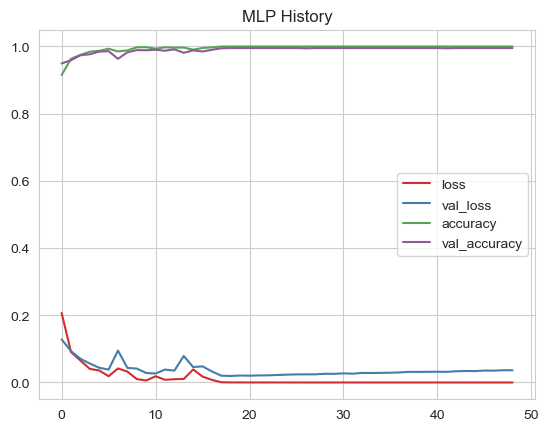

In [86]:
Graph_Drawing(mlp_history, "MLP History")

92/92 [==============================] - 0s 4ms/step


<AxesSubplot:>

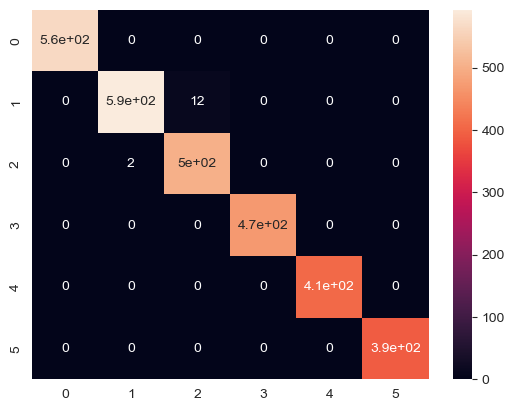

In [87]:
mlp_predict = mlp_model.predict( test_features )
original = test_labels

mlp_predict = np.argmax(mlp_predict, axis=1)
cf = metrics.confusion_matrix(mlp_predict, original)

sns.heatmap(cf, annot=True)

In [89]:
mlp_model.evaluate(test_features, test_labels.replace(np.unique(test_labels),  [0, 1, 2, 3,4,5]))

92/92 [==============================] - 0s 4ms/step - loss: 0.0194 - accuracy: 0.9952


[0.01937861740589142, 0.9952397346496582]

In [90]:
train_features = train_features.reshape(train_features.shape[0], train_features.shape[1], 1)
test_features = test_features.reshape(test_features.shape[0], test_features.shape[1], 1)

# Convolutional Neural Network

In [91]:
#Convolutional Neural Network
cnn_model = CNN_Model(train_features)
cnn_model.summary()

earlystopping = EarlyStopping(patience=30, monitor="val_accuracy", restore_best_weights=True)
cnn_history = cnn_model.fit( train_features,
                            train_labels, epochs=100, callbacks = [earlystopping],
                            validation_data=(test_features, test_labels) )

(36, 1)
Model: "CNN_Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv1D)             (None, 34, 64)            256       
                                                                 
 conv_2 (Conv1D)             (None, 32, 32)            6176      
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 64)                65600     
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 output (Dense)              (None, 6)                 774       
                                                                 
Total params: 81,126
Trainable params: 81,12

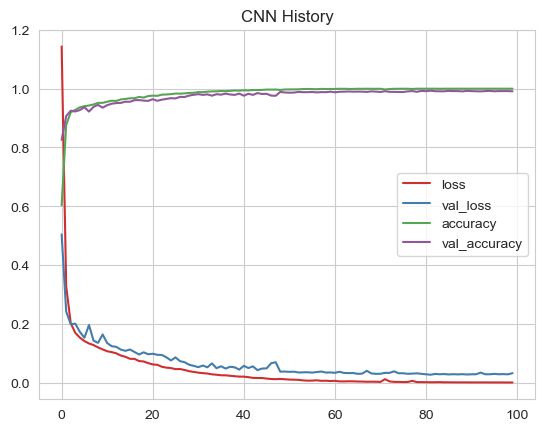

In [92]:
Graph_Drawing(cnn_history, "CNN History")

In [93]:
test_features.shape

(2941, 36, 1)

92/92 [==============================] - 0s 3ms/step


<AxesSubplot:>

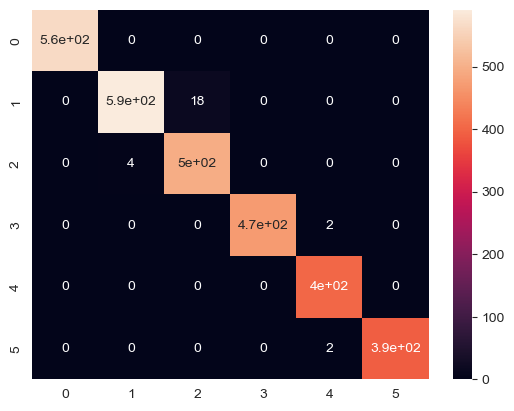

In [94]:
cnn_predict = cnn_model.predict( test_features )
original = test_labels

cnn_predict = np.argmax(cnn_predict, axis=1)
cf = metrics.confusion_matrix(cnn_predict, original)

sns.heatmap(cf, annot=True)

In [95]:
cnn_model.evaluate(test_features, test_labels)

92/92 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9912


[0.032591648399829865, 0.9911594986915588]

# Convolutional Neural Network + Long Short Term Memory Model

In [96]:
#Convolutional Neural Network + Long Short Term Memory Model
cnn_lstm_model = CNN_LSTM_Model(train_features)
cnn_lstm_model.summary()

earlystopping = EarlyStopping(patience=30, monitor="val_accuracy", restore_best_weights=True)
cnn_lstm_history = cnn_lstm_model.fit( train_features,
                            train_labels, epochs=100, callbacks = [earlystopping],
                            validation_data=(test_features, test_labels) )

(36, 1)
Model: "CNN_Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv1D)             (None, 34, 64)            256       
                                                                 
 conv_2 (Conv1D)             (None, 32, 32)            6176      
                                                                 
 LSTM (LSTM)                 (None, 10)                1720      
                                                                 
 dense_1 (Dense)             (None, 64)                704       
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 output (Dense)              (None, 6)                 774       
                                                                 
Total params: 17,950
Trainable params: 17,95

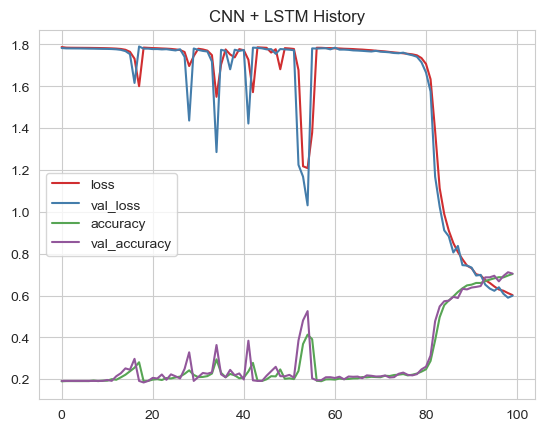

In [97]:
Graph_Drawing(cnn_lstm_history, "CNN + LSTM History")

92/92 [==============================] - 1s 6ms/step


<AxesSubplot:>

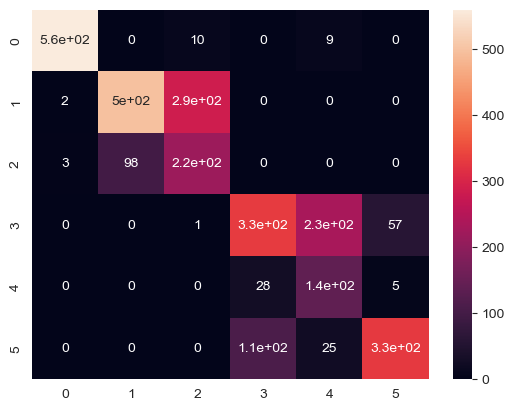

In [98]:
cnn_lstm_predict = cnn_lstm_model.predict( test_features )
original = test_labels

cnn_lstm_predict = np.argmax(cnn_lstm_predict, axis=1)
cf = metrics.confusion_matrix(cnn_lstm_predict, original)

sns.heatmap(cf, annot=True)

In [99]:
cnn_lstm_model.evaluate(test_features, test_labels)

92/92 [==============================] - 1s 7ms/step - loss: 0.5994 - accuracy: 0.7049


[0.5993675589561462, 0.7048622965812683]